# Libraries

In [1]:
# default libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
import time
import math

In [2]:
# plotting configuration
sns.set(style = 'darkgrid',
        font_scale = 1.4,
        rc = {"lines.linewidth": 2,
          "figure.figsize": (12, 8)})

sns.set_palette('Set2')

In [3]:
from tools import get_exponential_bins, compute_quantile_hist_data, compute_interval_score
from data_gen import generate_raw_data,get_binned_data_cookie_bucket_level
from hyp_tests import percentile_bootstrap_ci_ratio_cookie_buckets
from hyp_tests import bc_a_bootstrap_ratio_cookie_buckets
from data_gen import generate_raw_data_lognormal
from data_gen import generate_raw_data_exponential

# Simulations

## Comparison of two bootstrap methods

### Median

In [4]:
coverage_res_percentile_med=list()
coverage_res_bc_a_med=list()

length_percentile_med=list()
length_bc_a_med=list()

int_score_percentile_med=list()
int_score_bc_a_med=list()

boot_est_percentile = list()
boot_est_bc_a = list()


In [5]:
num_of_bootstrap_samples=[2000]
#,3000,4000,5000
num_of_sims=1000
num_of_cookie_buckets=20

bins_boundaries = get_exponential_bins(10,600000,100)

In [6]:
for i in range(num_of_sims):
    # generate raw data
    raw_data_treatment = generate_raw_data_lognormal(number_of_users = 1000, mean_param=10,sigma_param=5)
    raw_data_control = generate_raw_data_lognormal(number_of_users = 1000, mean_param=10,sigma_param=5)
    # bin raw data and place the clients into cookie buckets
    bucketed_data_treat = get_binned_data_cookie_bucket_level(raw_data_treatment,num_of_cookie_buckets, bins_boundaries)
    bucketed_data_control = get_binned_data_cookie_bucket_level(raw_data_control,num_of_cookie_buckets, bins_boundaries)

    for cur_number_of_bootstrap_samples in num_of_bootstrap_samples:

        res_percentile = percentile_bootstrap_ci_ratio_cookie_buckets(bucketed_data_treat, bucketed_data_control,
                                            bins_boundaries, 2000, 0.95,
                                            estimator_type='quantile',
                                            quantile=0.5, return_interval=True,return_bootstrap_est=False)
        res_bc_a = bc_a_bootstrap_ratio_cookie_buckets(bucketed_data_treat, bucketed_data_control,
                                            bins_boundaries, 2000, 0.95,
                                            estimator_type='quantile',
                                            quantile=0.5, return_interval=True,return_bootstrap_est=False)

        # add coverage result
        coverage_res_percentile_med+=[res_percentile[0]]
        coverage_res_bc_a_med+=[res_bc_a[0]]

        #add length
        length_percentile_med+=[res_percentile[1][1]-res_percentile[1][0]]
        length_bc_a_med+=[res_bc_a[1][1]-res_bc_a[1][0]]

        #add scores
        int_score_percentile_med+=[compute_interval_score(res_percentile[1][1],res_percentile[1][0],1-0.95,0)]
        int_score_bc_a_med+=[compute_interval_score(res_bc_a[1][1],res_bc_a[1][0],1-0.95,0)]

        # #store boots est
        # boot_est_percentile+=[res_percentile[2]]
        # boot_est_bc_a+=[res_bc_a[2]]

In [7]:
print('Average rejection rate for percentile bootstrap: ', np.mean(coverage_res_percentile_med))
print('Average rejection rate for BCa bootstrap: ', np.mean(coverage_res_bc_a_med))
print('Average length for percentile bootstrap: ', np.mean(length_percentile_med))
print('Average length for BCa bootstrap: ', np.mean(length_bc_a_med))
print('Average interval score for percentile bootstrap: ', np.mean(int_score_percentile_med))
print('Average intervals score for BCa bootstrap: ', np.mean(int_score_bc_a_med))


Average rejection rate for percentile bootstrap:  0.064
Average rejection rate for BCa bootstrap:  0.065
Average length for percentile bootstrap:  17.978709155341836
Average length for BCa bootstrap:  18.085696985665766
Average interval score for percentile bootstrap:  23.398603850315517
Average intervals score for BCa bootstrap:  23.402854256194217


In [8]:
exp_coverage_res_percentile_med=list()
exp_coverage_res_bc_a_med=list()

exp_length_percentile_med=list()
exp_length_bc_a_med=list()

exp_int_score_percentile_med=list()
exp_int_score_bc_a_med=list()

exp_boot_est_percentile = list()
exp_boot_est_bc_a = list()


In [9]:
for i in range(num_of_sims):
    # generate raw data
    raw_data_treatment = generate_raw_data_exponential(number_of_users = 1000, scale_param=500)
    raw_data_control = generate_raw_data_exponential(number_of_users = 1000, scale_param=500)
    # bin raw data and place the clients into cookie buckets
    bucketed_data_treat = get_binned_data_cookie_bucket_level(raw_data_treatment,num_of_cookie_buckets, bins_boundaries)
    bucketed_data_control = get_binned_data_cookie_bucket_level(raw_data_control,num_of_cookie_buckets, bins_boundaries)

    for cur_number_of_bootstrap_samples in num_of_bootstrap_samples:

        res_percentile = percentile_bootstrap_ci_ratio_cookie_buckets(bucketed_data_treat, bucketed_data_control,
                                            bins_boundaries, 2000, 0.95,
                                            estimator_type='quantile',
                                            quantile=0.5, return_interval=True)
        res_bc_a = bc_a_bootstrap_ratio_cookie_buckets(bucketed_data_treat, bucketed_data_control,
                                            bins_boundaries, 2000, 0.95,
                                            estimator_type='quantile',
                                            quantile=0.5, return_interval=True)

        # add coverage result
        exp_coverage_res_percentile_med+=[res_percentile[0]]
        exp_coverage_res_bc_a_med+=[res_bc_a[0]]

        #add length
        exp_length_percentile_med+=[res_percentile[1][1]-res_percentile[1][0]]
        exp_length_bc_a_med+=[res_bc_a[1][1]-res_bc_a[1][0]]

        #add scores
        exp_int_score_percentile_med+=[compute_interval_score(res_percentile[1][1],res_percentile[1][0],1-0.95,0)]
        exp_int_score_bc_a_med+=[compute_interval_score(res_bc_a[1][1],res_bc_a[1][0],1-0.95,0)]

        # #store boots est
        # exp_boot_est_percentile+=[res_percentile[2]]
        # exp_boot_est_bc_a+=[res_bc_a[2]]

In [10]:
print('Average rejection rate for percentile bootstrap: ', np.mean(exp_coverage_res_percentile_med))
print('Average rejection rate for BCa bootstrap: ', np.mean(exp_coverage_res_bc_a_med))
print('Average length for percentile bootstrap: ', np.mean(exp_length_percentile_med))
print('Average length for BCa bootstrap: ', np.mean(exp_length_bc_a_med))
print('Average interval score for percentile bootstrap: ', np.mean(exp_int_score_percentile_med))
print('Average intervals score for BCa bootstrap: ', np.mean(exp_int_score_bc_a_med))

Average rejection rate for percentile bootstrap:  0.068
Average rejection rate for BCa bootstrap:  0.069
Average length for percentile bootstrap:  4.205216034227646
Average length for BCa bootstrap:  4.219275137928827
Average interval score for percentile bootstrap:  5.400635568556303
Average intervals score for BCa bootstrap:  5.404311417547621


In [190]:
exp_coverage_res_percentile_95=list()
exp_coverage_res_bc_a_95=list()

exp_length_percentile_95=list()
exp_length_bc_a_95=list()

exp_int_score_percentile_95=list()
exp_int_score_bc_a_95=list()

exp_boot_est_percentile_95 = list()
exp_boot_est_bc_a_95 = list()

In [186]:
import importlib, sys
importlib.reload(sys.modules['hyp_tests'])
from hyp_tests import bc_a_bootstrap_ratio_cookie_buckets

In [191]:
for i in range(num_of_sims):
    # generate raw data
    raw_data_treatment = generate_raw_data_exponential(number_of_users = 1000, scale_param=500)
    raw_data_control = generate_raw_data_exponential(number_of_users = 1000, scale_param=500)
    # bin raw data and place the clients into cookie buckets
    bucketed_data_treat = get_binned_data_cookie_bucket_level(raw_data_treatment,num_of_cookie_buckets, bins_boundaries)
    bucketed_data_control = get_binned_data_cookie_bucket_level(raw_data_control,num_of_cookie_buckets, bins_boundaries)

    for cur_number_of_bootstrap_samples in num_of_bootstrap_samples:

        res_percentile = percentile_bootstrap_ci_ratio_cookie_buckets(bucketed_data_treat, bucketed_data_control,
                                            bins_boundaries, 2000, 0.95,
                                            estimator_type='quantile',
                                            quantile=0.95, return_interval=True,return_bootstrap_est=True)
        res_bc_a = bc_a_bootstrap_ratio_cookie_buckets(bucketed_data_treat, bucketed_data_control,
                                            bins_boundaries, 2000, 0.95,
                                            estimator_type='quantile',
                                            quantile=0.95, return_interval=True,return_bootstrap_est=True)

        # add coverage result
        exp_coverage_res_percentile_95+=[res_percentile[0]]
        exp_coverage_res_bc_a_95+=[res_bc_a[0]]

        #add length
        exp_length_percentile_95+=[res_percentile[1][1]-res_percentile[1][0]]
        exp_length_bc_a_95+=[res_bc_a[1][1]-res_bc_a[1][0]]

        #add scores
        exp_int_score_percentile_95+=[compute_interval_score(res_percentile[1][1],res_percentile[1][0],1-0.95,0)]
        exp_int_score_bc_a_95+=[compute_interval_score(res_bc_a[1][1],res_bc_a[1][0],1-0.95,0)]

        #store boots est
        exp_boot_est_percentile_95+=[res_percentile[2]]
        exp_boot_est_bc_a_95+=[res_bc_a[2]]

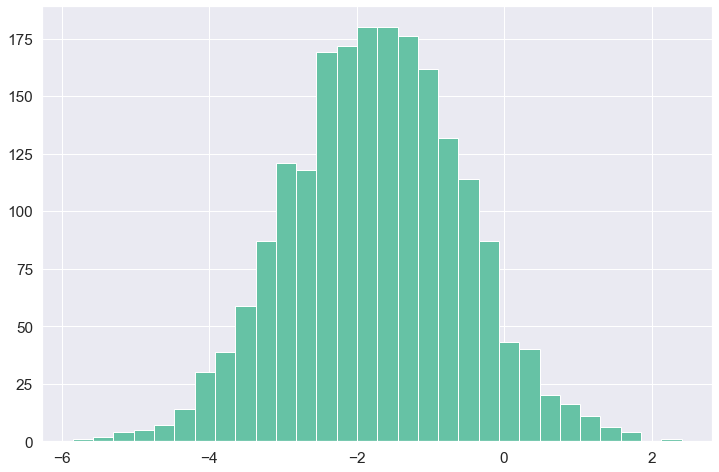

In [336]:
plt.hist(exp_boot_est_bc_a_95[9],bins=30)
plt.show()

In [192]:
print('Average rejection rate for percentile bootstrap: ', np.mean(exp_coverage_res_percentile_95))
print('Average rejection rate for BCa bootstrap: ', np.mean(exp_coverage_res_bc_a_95))
print('Average length for percentile bootstrap: ', np.mean(exp_length_percentile_95))
print('Average length for BCa bootstrap: ', np.mean(exp_length_bc_a_95))
print('Average interval score for percentile bootstrap: ', np.mean(exp_int_score_percentile_95))
print('Average intervals score for BCa bootstrap: ', np.mean(exp_int_score_bc_a_95))


Average rejection rate for percentile bootstrap:  0.067
Average rejection rate for BCa bootstrap:  0.072
Average length for percentile bootstrap:  3.966007886098809
Average length for BCa bootstrap:  3.986527746337072
Average interval score for percentile bootstrap:  5.134055144311689
Average intervals score for BCa bootstrap:  5.153522167928411


In [180]:
print('Average rejection rate for percentile bootstrap: ', np.mean(exp_coverage_res_percentile_95))
print('Average rejection rate for BCa bootstrap: ', np.mean(exp_coverage_res_bc_a_95))
print('Average length for percentile bootstrap: ', np.mean(exp_length_percentile_95))
print('Average length for BCa bootstrap: ', np.mean(exp_length_bc_a_95))
print('Average interval score for percentile bootstrap: ', np.mean(exp_int_score_percentile_95))
print('Average intervals score for BCa bootstrap: ', np.mean(exp_int_score_bc_a_95))


Average rejection rate for percentile bootstrap:  0.059
Average rejection rate for BCa bootstrap:  0.059
Average length for percentile bootstrap:  3.984018496572482
Average length for BCa bootstrap:  3.99778299703246
Average interval score for percentile bootstrap:  4.810016044516587
Average intervals score for BCa bootstrap:  4.802000129737906


In [173]:
print('Average rejection rate for percentile bootstrap: ', np.mean(exp_coverage_res_percentile_95))
print('Average rejection rate for BCa bootstrap: ', np.mean(exp_coverage_res_bc_a_95))
print('Average length for percentile bootstrap: ', np.mean(exp_length_percentile_95))
print('Average length for BCa bootstrap: ', np.mean(exp_length_bc_a_95))
print('Average interval score for percentile bootstrap: ', np.mean(exp_int_score_percentile_95))
print('Average intervals score for BCa bootstrap: ', np.mean(exp_int_score_bc_a_95))


Average rejection rate for percentile bootstrap:  0.074
Average rejection rate for BCa bootstrap:  0.072
Average length for percentile bootstrap:  3.9828424418380766
Average length for BCa bootstrap:  4.000589117586448
Average interval score for percentile bootstrap:  5.125931321876103
Average intervals score for BCa bootstrap:  5.176664426176547


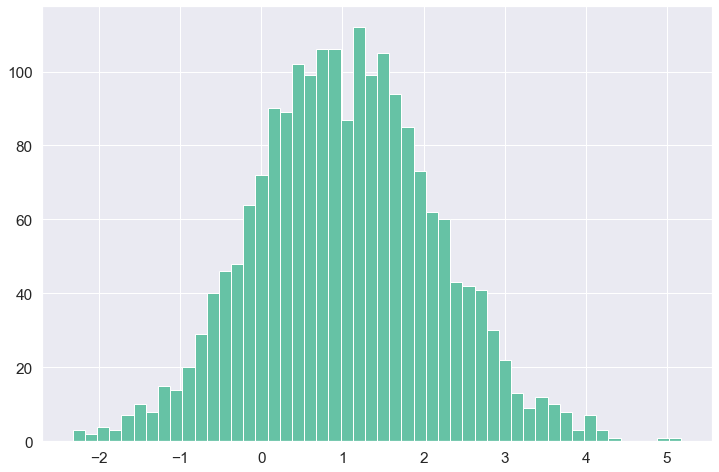

In [335]:
plt.hist(exp_boot_est_bc_a_95[8],bins=50)
plt.show()

### 99th percentile

In [ ]:
coverage_res_percentile_99=list()
coverage_res_bc_a_99=list()

length_percentile_99=list()
length_bc_a_99=list()

int_score_percentile_99=list()
int_score_bc_a_99=list()

boot_est_percentile_99 = list()
boot_est_bc_a_99 = list()


In [ ]:
for i in range(num_of_sims):
    # generate raw data
    raw_data_treatment = generate_raw_data_lognormal(number_of_users = 1000, mean_param=500,sigma_param=200)
    raw_data_control = generate_raw_data_lognormal(number_of_users = 1000, mean_param=500,sigma_param=200)
    # bin raw data and place the clients into cookie buckets
    bucketed_data_treat = get_binned_data_cookie_bucket_level(raw_data_treatment,num_of_cookie_buckets, bins_boundaries)
    bucketed_data_control = get_binned_data_cookie_bucket_level(raw_data_control,num_of_cookie_buckets, bins_boundaries)

    for cur_number_of_bootstrap_samples in num_of_bootstrap_samples:

        res_percentile = percentile_bootstrap_ci_ratio_cookie_buckets(bucketed_data_treat, bucketed_data_control,
                                            bins_boundaries, 2000, 0.95,
                                            estimator_type='quantile',
                                            quantile=0.99, return_interval=True)
        res_bc_a = bc_a_bootstrap_ratio_cookie_buckets(bucketed_data_treat, bucketed_data_control,
                                            bins_boundaries, 2000, 0.95,
                                            estimator_type='quantile',
                                            quantile=0.99, return_interval=True)

        # add coverage result
        coverage_res_percentile_99+=[res_percentile[0]]
        coverage_res_bc_a_99+=[res_bc_a[0]]

        #add length
        length_percentile_99+=[res_percentile[1][1]-res_percentile[1][0]]
        length_bc_a_99+=[res_bc_a[1][1]-res_bc_a[1][0]]

        #add scores
        int_score_percentile_99+=[compute_interval_score(res_percentile[1][1],res_percentile[1][0],1-0.95,0)]
        int_score_bc_a_99+=[compute_interval_score(res_bc_a[1][1],res_bc_a[1][0],1-0.95,0)]

        # #store boots est
        # boot_est_percentile_99+=[res_percentile[2]]
        # boot_est_bc_a_99+=[res_bc_a[2]]

In [ ]:
print('Average rejection rate for percentile bootstrap: ', np.mean(coverage_res_percentile_99))
print('Average rejection rate for BCa bootstrap: ', np.mean(coverage_res_bc_a_99))
print('Average length for percentile bootstrap: ', np.mean(length_percentile_99))
print('Average length for BCa bootstrap: ', np.mean(length_bc_a_99))
print('Average interval score for percentile bootstrap: ', np.mean(int_score_percentile_99))
print('Average intervals score for BCa bootstrap: ', np.mean(int_score_bc_a_99))


In [201]:
exp_coverage_res_percentile_99=list()
exp_coverage_res_bc_a_99=list()

exp_length_percentile_99=list()
exp_length_bc_a_99=list()

exp_int_score_percentile_99=list()
exp_int_score_bc_a_99=list()

exp_boot_est_percentile_99 = list()
exp_boot_est_bc_a_99 = list()

In [202]:
for i in range(num_of_sims):
    # generate raw data
    raw_data_treatment = generate_raw_data_exponential(number_of_users = 1000, scale_param=500)
    raw_data_control = generate_raw_data_exponential(number_of_users = 1000, scale_param=500)
    # bin raw data and place the clients into cookie buckets
    bucketed_data_treat = get_binned_data_cookie_bucket_level(raw_data_treatment,num_of_cookie_buckets, bins_boundaries)
    bucketed_data_control = get_binned_data_cookie_bucket_level(raw_data_control,num_of_cookie_buckets, bins_boundaries)

    for cur_number_of_bootstrap_samples in num_of_bootstrap_samples:

        res_percentile = percentile_bootstrap_ci_ratio_cookie_buckets(bucketed_data_treat, bucketed_data_control,
                                            bins_boundaries, 2000, 0.95,
                                            estimator_type='quantile',
                                            quantile=0.99, return_interval=True)
        res_bc_a = bc_a_bootstrap_ratio_cookie_buckets(bucketed_data_treat, bucketed_data_control,
                                            bins_boundaries, 2000, 0.95,
                                            estimator_type='quantile',
                                            quantile=0.99, return_interval=True)

        # add coverage result
        exp_coverage_res_percentile_99+=[res_percentile[0]]
        exp_coverage_res_bc_a_99+=[res_bc_a[0]]

        #add length
        exp_length_percentile_99+=[res_percentile[1][1]-res_percentile[1][0]]
        exp_length_bc_a_99+=[res_bc_a[1][1]-res_bc_a[1][0]]

        #add scores
        exp_int_score_percentile_99+=[compute_interval_score(res_percentile[1][1],res_percentile[1][0],1-0.95,0)]
        exp_int_score_bc_a_99+=[compute_interval_score(res_bc_a[1][1],res_bc_a[1][0],1-0.95,0)]

        # #store boots est
        # exp_boot_est_percentile_99+=[res_percentile[2]]
        # exp_boot_est_bc_a_99+=[res_bc_a[2]]

In [203]:
print('Average rejection rate for percentile bootstrap: ', np.mean(exp_coverage_res_percentile_99))
print('Average rejection rate for BCa bootstrap: ', np.mean(exp_coverage_res_bc_a_99))
print('Average length for percentile bootstrap: ', np.mean(exp_length_percentile_99))
print('Average length for BCa bootstrap: ', np.mean(exp_length_bc_a_99))
print('Average interval score for percentile bootstrap: ', np.mean(exp_int_score_percentile_99))
print('Average intervals score for BCa bootstrap: ', np.mean(exp_int_score_bc_a_99))


Average rejection rate for percentile bootstrap:  0.062
Average rejection rate for BCa bootstrap:  0.061
Average length for percentile bootstrap:  5.997862297169344
Average length for BCa bootstrap:  6.019190595879048
Average interval score for percentile bootstrap:  7.5875445336464304
Average intervals score for BCa bootstrap:  7.5329941793031345


### less bootstrap samples

In [291]:
importlib.reload(sys.modules['data_gen'])

<module 'data_gen' from '/Users/apodkopaev/Desktop/code/data_gen.py'>

In [292]:
from data_gen import generate_raw_data_mixture_of_lognormal

In [299]:
less_coverage_res_percentile_95=list()
less_coverage_res_bc_a_95=list()

less_length_percentile_95=list()
less_length_bc_a_95=list()

less_int_score_percentile_95=list()
less_int_score_bc_a_95=list()

less_boot_est_percentile_95 = list()
less_boot_est_bc_a_95 = list()

In [300]:
vec_of_means = np.array([6,8])
vec_of_stds = np.array([0.5,0.25])
weights=[0.5,0.5]

In [301]:
for i in range(num_of_sims):
    # generate raw data
    raw_data_treatment = generate_raw_data_mixture_of_lognormal(1000,vec_of_means,vec_of_stds,weights)
    raw_data_control = generate_raw_data_mixture_of_lognormal(1000,vec_of_means,vec_of_stds,weights)
    # bin raw data and place the clients into cookie buckets
    bucketed_data_treat = get_binned_data_cookie_bucket_level(raw_data_treatment,num_of_cookie_buckets, bins_boundaries)
    bucketed_data_control = get_binned_data_cookie_bucket_level(raw_data_control,num_of_cookie_buckets, bins_boundaries)

    for cur_number_of_bootstrap_samples in num_of_bootstrap_samples:

        res_percentile = percentile_bootstrap_ci_ratio_cookie_buckets(bucketed_data_treat, bucketed_data_control,
                                            bins_boundaries, 1000, 0.95,
                                            estimator_type='quantile',
                                            quantile=0.95, return_interval=True,return_bootstrap_est=True)
        res_bc_a = bc_a_bootstrap_ratio_cookie_buckets(bucketed_data_treat, bucketed_data_control,
                                            bins_boundaries, 1000, 0.95,
                                            estimator_type='quantile',
                                            quantile=0.95, return_interval=True,return_bootstrap_est=True)

        # add coverage result
        less_coverage_res_percentile_95+=[res_percentile[0]]
        less_coverage_res_bc_a_95+=[res_bc_a[0]]

        #add length
        less_length_percentile_95+=[res_percentile[1][1]-res_percentile[1][0]]
        less_length_bc_a_95+=[res_bc_a[1][1]-res_bc_a[1][0]]

        #add scores
        less_int_score_percentile_95+=[compute_interval_score(res_percentile[1][1],res_percentile[1][0],1-0.95,0)]
        less_int_score_bc_a_95+=[compute_interval_score(res_bc_a[1][1],res_bc_a[1][0],1-0.95,0)]

        #store boots est
        less_boot_est_percentile_95+=[res_percentile[2]]
        less_boot_est_bc_a_95+=[res_bc_a[2]]

In [302]:
print('Average rejection rate for percentile bootstrap: ', np.mean(less_coverage_res_percentile_95))
print('Average rejection rate for BCa bootstrap: ', np.mean(less_coverage_res_bc_a_95))
print('Average length for percentile bootstrap: ', np.mean(less_length_percentile_95))
print('Average length for BCa bootstrap: ', np.mean(less_length_bc_a_95))
print('Average interval score for percentile bootstrap: ', np.mean(less_int_score_percentile_95))
print('Average intervals score for BCa bootstrap: ', np.mean(less_int_score_bc_a_95))


Average rejection rate for percentile bootstrap:  0.081
Average rejection rate for BCa bootstrap:  0.081
Average length for percentile bootstrap:  1.5151464240252261
Average length for BCa bootstrap:  1.521627574608006
Average interval score for percentile bootstrap:  2.075170440636771
Average intervals score for BCa bootstrap:  2.0715568767414374


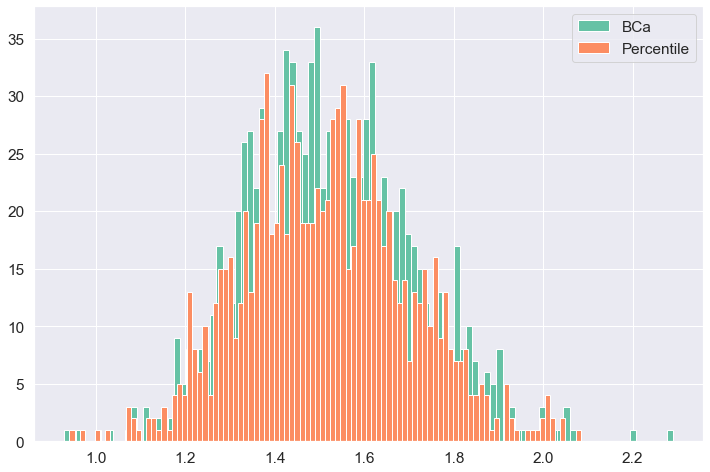

In [339]:
plt.hist(less_length_bc_a_95, bins=100, label='BCa')
plt.hist(less_length_percentile_95, bins=100, label='Percentile')
plt.legend()
plt.show()

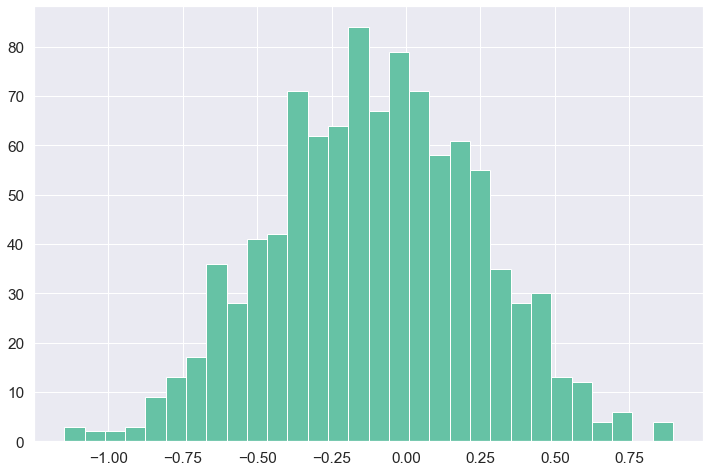

In [347]:
plt.hist(less_boot_est_bc_a_95[13], bins=30)
plt.show()

### More cookie buckets

In [307]:
more_exp_coverage_res_percentile_95=list()
more_exp_coverage_res_bc_a_95=list()

more_exp_length_percentile_95=list()
more_exp_length_bc_a_95=list()

more_exp_int_score_percentile_95=list()
more_exp_int_score_bc_a_95=list()

more_exp_boot_est_percentile_95 = list()
more_exp_boot_est_bc_a_95 = list()

In [308]:
num_of_cookie_buckets = 30

In [309]:
for i in range(num_of_sims):
    # generate raw data
    raw_data_treatment = generate_raw_data_exponential(number_of_users = 1000, scale_param=500)
    raw_data_control = generate_raw_data_exponential(number_of_users = 1000, scale_param=500)
    # bin raw data and place the clients into cookie buckets
    bucketed_data_treat = get_binned_data_cookie_bucket_level(raw_data_treatment,num_of_cookie_buckets, bins_boundaries)
    bucketed_data_control = get_binned_data_cookie_bucket_level(raw_data_control,num_of_cookie_buckets, bins_boundaries)

    for cur_number_of_bootstrap_samples in num_of_bootstrap_samples:

        res_percentile = percentile_bootstrap_ci_ratio_cookie_buckets(bucketed_data_treat, bucketed_data_control,
                                            bins_boundaries, 2000, 0.95,
                                            estimator_type='quantile',
                                            quantile=0.95, return_interval=True,return_bootstrap_est=True)
        res_bc_a = bc_a_bootstrap_ratio_cookie_buckets(bucketed_data_treat, bucketed_data_control,
                                            bins_boundaries, 2000, 0.95,
                                            estimator_type='quantile',
                                            quantile=0.95, return_interval=True,return_bootstrap_est=True)

        # add coverage result
        more_exp_coverage_res_percentile_95+=[res_percentile[0]]
        more_exp_coverage_res_bc_a_95+=[res_bc_a[0]]

        #add length
        more_exp_length_percentile_95+=[res_percentile[1][1]-res_percentile[1][0]]
        more_exp_length_bc_a_95+=[res_bc_a[1][1]-res_bc_a[1][0]]

        #add scores
        more_exp_int_score_percentile_95+=[compute_interval_score(res_percentile[1][1],res_percentile[1][0],1-0.95,0)]
        more_exp_int_score_bc_a_95+=[compute_interval_score(res_bc_a[1][1],res_bc_a[1][0],1-0.95,0)]

        #store boots est
        more_exp_boot_est_percentile_95+=[res_percentile[2]]
        more_exp_boot_est_bc_a_95+=[res_bc_a[2]]

In [310]:
print('Average rejection rate for percentile bootstrap: ', np.mean(more_exp_coverage_res_percentile_95))
print('Average rejection rate for BCa bootstrap: ', np.mean(more_exp_coverage_res_bc_a_95))
print('Average length for percentile bootstrap: ', np.mean(more_exp_length_percentile_95))
print('Average length for BCa bootstrap: ', np.mean(more_exp_length_bc_a_95))
print('Average interval score for percentile bootstrap: ', np.mean(more_exp_int_score_percentile_95))
print('Average intervals score for BCa bootstrap: ', np.mean(more_exp_int_score_bc_a_95))


Average rejection rate for percentile bootstrap:  0.054
Average rejection rate for BCa bootstrap:  0.053
Average length for percentile bootstrap:  4.028533500508783
Average length for BCa bootstrap:  4.0427987657574365
Average interval score for percentile bootstrap:  4.934674940649826
Average intervals score for BCa bootstrap:  4.960896467811756


In [311]:
even_more_exp_coverage_res_percentile_95=list()
even_more_exp_coverage_res_bc_a_95=list()

even_more_exp_length_percentile_95=list()
even_more_exp_length_bc_a_95=list()

even_more_exp_int_score_percentile_95=list()
even_more_exp_int_score_bc_a_95=list()

even_more_exp_boot_est_percentile_95 = list()
even_more_exp_boot_est_bc_a_95 = list()

In [312]:
num_of_cookie_buckets = 40

In [314]:
num_of_sims=2000

In [315]:
for i in range(num_of_sims):
    # generate raw data
    raw_data_treatment = generate_raw_data_exponential(number_of_users = 1000, scale_param=500)
    raw_data_control = generate_raw_data_exponential(number_of_users = 1000, scale_param=500)
    # bin raw data and place the clients into cookie buckets
    bucketed_data_treat = get_binned_data_cookie_bucket_level(raw_data_treatment,num_of_cookie_buckets, bins_boundaries)
    bucketed_data_control = get_binned_data_cookie_bucket_level(raw_data_control,num_of_cookie_buckets, bins_boundaries)

    for cur_number_of_bootstrap_samples in num_of_bootstrap_samples:

        res_percentile = percentile_bootstrap_ci_ratio_cookie_buckets(bucketed_data_treat, bucketed_data_control,
                                            bins_boundaries, 2000, 0.95,
                                            estimator_type='quantile',
                                            quantile=0.95, return_interval=True)
        res_bc_a = bc_a_bootstrap_ratio_cookie_buckets(bucketed_data_treat, bucketed_data_control,
                                            bins_boundaries, 2000, 0.95,
                                            estimator_type='quantile',
                                            quantile=0.95, return_interval=True)

        # add coverage result
        even_more_exp_coverage_res_percentile_95+=[res_percentile[0]]
        even_more_exp_coverage_res_bc_a_95+=[res_bc_a[0]]

        #add length
        even_more_exp_length_percentile_95+=[res_percentile[1][1]-res_percentile[1][0]]
        even_more_exp_length_bc_a_95+=[res_bc_a[1][1]-res_bc_a[1][0]]

        #add scores
        even_more_exp_int_score_percentile_95+=[compute_interval_score(res_percentile[1][1],res_percentile[1][0],1-0.95,0)]
        even_more_exp_int_score_bc_a_95+=[compute_interval_score(res_bc_a[1][1],res_bc_a[1][0],1-0.95,0)]

        # #store boots est
        # even_more_exp_boot_est_percentile_95+=[res_percentile[2]]
        # even_more_exp_boot_est_bc_a_95+=[res_bc_a[2]]

In [316]:
print('Average rejection rate for percentile bootstrap: ', np.mean(even_more_exp_coverage_res_percentile_95))
print('Average rejection rate for BCa bootstrap: ', np.mean(even_more_exp_coverage_res_bc_a_95))
print('Average length for percentile bootstrap: ', np.mean(even_more_exp_length_percentile_95))
print('Average length for BCa bootstrap: ', np.mean(even_more_exp_length_bc_a_95))
print('Average interval score for percentile bootstrap: ', np.mean(even_more_exp_int_score_percentile_95))
print('Average intervals score for BCa bootstrap: ', np.mean(even_more_exp_int_score_bc_a_95))


Average rejection rate for percentile bootstrap:  0.054
Average rejection rate for BCa bootstrap:  0.053
Average length for percentile bootstrap:  4.042072938583922
Average length for BCa bootstrap:  4.0528640517343435
Average interval score for percentile bootstrap:  4.936231487509454
Average intervals score for BCa bootstrap:  4.936600804264869


# Varying number of cookie buckets

## Exponential case

In [462]:
varying_res_percentile_95=list()
varying_res_bc_a_95=list()
varying_res_jack_95=list()

varying_length_percentile_95=list()
varying_length_bc_a_95=list()
varying_length_jack_95=list()

varying_int_score_percentile_95=list()
varying_int_score_bc_a_95=list()
varying_int_score_jack_95=list()

agreed_jack_bc_a = list()
agreed_jack_percentile = list()
agreed_bc_a_percentile = list()
agreed_all_three = list()

In [463]:
num_of_cookie_buckets = [10,20,30,40,50,60,70,80,90,100]

In [464]:
for cur_num_of_cookie_buckets in num_of_cookie_buckets:
    varying_res_percentile_95+=[[]]
    varying_res_bc_a_95+=[[]]
    varying_res_jack_95+=[[]]

    varying_length_percentile_95+=[[]]
    varying_length_bc_a_95+=[[]]
    varying_length_jack_95+=[[]]

    varying_int_score_percentile_95+=[[]]
    varying_int_score_bc_a_95+=[[]]
    varying_int_score_jack_95+=[[]]

    agreed_jack_bc_a +=[[]]
    agreed_jack_percentile+=[[]]
    agreed_bc_a_percentile +=[[]]
    agreed_all_three +=[[]]


In [465]:
num_of_sims=1000

In [466]:
for i in range(num_of_sims):
    # generate raw data
    raw_data_treatment = generate_raw_data_exponential(number_of_users = 1000, scale_param=500)
    raw_data_control = generate_raw_data_exponential(number_of_users = 1000, scale_param=500)

    for cur_ind, cur_num_of_cookie_buckets in enumerate(num_of_cookie_buckets):

        # bin raw data and place the clients into cookie buckets
        bucketed_data_treat = get_binned_data_cookie_bucket_level(raw_data_treatment,cur_num_of_cookie_buckets, bins_boundaries)
        bucketed_data_control = get_binned_data_cookie_bucket_level(raw_data_control,cur_num_of_cookie_buckets, bins_boundaries)

        res_percentile = percentile_bootstrap_ci_ratio_cookie_buckets(bucketed_data_treat, bucketed_data_control,
                                            bins_boundaries, 2000, 0.95,
                                            estimator_type='quantile',
                                            quantile=0.95, return_interval=True)

        res_bc_a = bc_a_bootstrap_ratio_cookie_buckets(bucketed_data_treat, bucketed_data_control,
                                            bins_boundaries, 2000, 0.95,
                                            estimator_type='quantile',
                                            quantile=0.95, return_interval=True)
        
        res_jack = jackknife_cookie_bucket_quantile_bucketed(bucketed_data_treat, bucketed_data_control,
                                            bins_boundaries, 0.95,
                                            quantile_to_test= 0.95, return_interval=True)

        # add coverage result
        varying_res_percentile_95[cur_ind]+=[res_percentile[0]]
        varying_res_bc_a_95[cur_ind]+=[res_bc_a[0]]
        varying_res_jack_95[cur_ind]+=[res_jack[0]]

        #add length
        varying_length_percentile_95[cur_ind]+=[res_percentile[1][1]-res_percentile[1][0]]
        varying_length_bc_a_95[cur_ind]+=[res_bc_a[1][1]-res_bc_a[1][0]]
        varying_length_jack_95[cur_ind]+=[res_jack[1][1]-res_jack[1][0]]

        #add scores
        varying_int_score_percentile_95[cur_ind]+=[compute_interval_score(res_percentile[1][1],res_percentile[1][0],1-0.95,0)]
        varying_int_score_bc_a_95[cur_ind]+=[compute_interval_score(res_bc_a[1][1],res_bc_a[1][0],1-0.95,0)]
        varying_int_score_jack_95[cur_ind]+=[compute_interval_score(res_jack[1][1],res_jack[1][0],1-0.95,0)]

        agreed_bc_a_percentile[cur_ind]+=[res_bc_a[0]==res_percentile[0]]
        agreed_jack_bc_a[cur_ind]+=[res_jack[0]==res_bc_a[0]]
        agreed_jack_percentile[cur_ind]+=[res_jack[0]==res_percentile[0]]
        agreed_all_three[cur_ind]+=[res_jack[0]==res_percentile[0] == res_bc_a[0]]


In [597]:
aver_rej_rate_percentile = np.array([np.mean(cur_sample) for cur_sample in varying_res_percentile_95])
aver_rej_rate_bca = np.array([np.mean(cur_sample) for cur_sample in varying_res_bc_a_95])
aver_rej_rate_jack = np.array([np.mean(cur_sample) for cur_sample in varying_res_jack_95])

aver_length_percentile = np.array([np.mean(cur_sample) for cur_sample in varying_length_percentile_95])
aver_length_bca = np.array([np.mean(cur_sample) for cur_sample in varying_length_bc_a_95])
aver_length_jack = np.array([np.mean(cur_sample) for cur_sample in varying_length_jack_95])

aver_int_score_percentile = np.array([np.mean(cur_sample) for cur_sample in varying_int_score_percentile_95])
aver_int_score_bca = np.array([np.mean(cur_sample) for cur_sample in varying_int_score_bc_a_95])
aver_int_score_jack = np.array([np.mean(cur_sample) for cur_sample in varying_int_score_jack_95])

aver_agreed_jack_bca = np.array([np.mean(cur_sample) for cur_sample in agreed_jack_bc_a])
aver_agreed_jack_percentile = np.array([np.mean(cur_sample) for cur_sample in agreed_jack_percentile])
aver_agreed_bca_percentile = np.array([np.mean(cur_sample) for cur_sample in agreed_bc_a_percentile])
aver_agreed_all_three = np.array([np.mean(cur_sample) for cur_sample in agreed_all_three])


In [598]:
std_aver_rej_rate_percentile = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in varying_res_percentile_95])
std_aver_rej_rate_bca = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in varying_res_bc_a_95])
std_aver_rej_rate_jack = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in varying_res_jack_95])

std_aver_length_percentile = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in varying_length_percentile_95])
std_aver_length_bca = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in varying_length_bc_a_95])
std_aver_length_jack = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in varying_length_jack_95])

std_aver_int_score_percentile = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in varying_int_score_percentile_95])
std_aver_int_score_bca = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in varying_int_score_bc_a_95])
std_aver_int_score_jack = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in varying_int_score_jack_95])

std_aver_agreed_jack_bca = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in agreed_jack_bc_a])
std_aver_agreed_jack_percentile = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in agreed_jack_percentile])
std_aver_agreed_bca_percentile = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in agreed_bc_a_percentile])
std_aver_agreed_all_three = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in agreed_all_three])


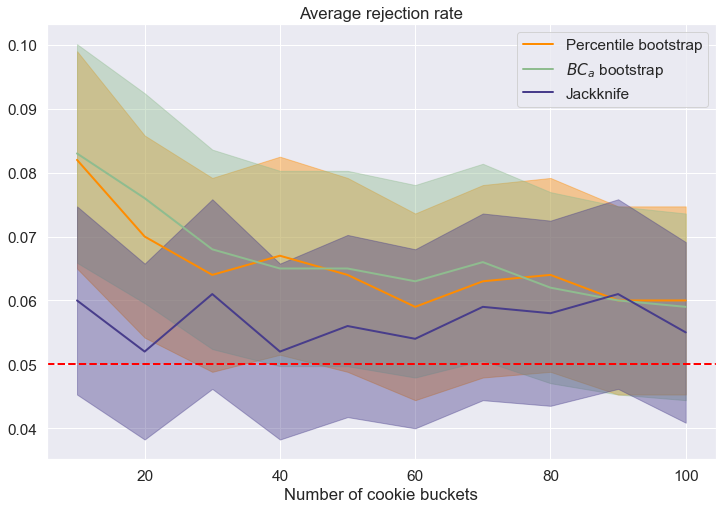

In [606]:
plt.plot(num_of_cookie_buckets, aver_rej_rate_percentile, c='DarkOrange', label='Percentile bootstrap')
plt.plot(num_of_cookie_buckets, aver_rej_rate_bca, c='DarkSeaGreen', label='$BC_a$ bootstrap')
plt.plot(num_of_cookie_buckets, aver_rej_rate_jack, c='darkslateblue', label='Jackknife')

plt.fill_between(num_of_cookie_buckets,aver_rej_rate_percentile - 1.96 * std_aver_rej_rate_percentile,
    aver_rej_rate_percentile + 1.96*std_aver_rej_rate_percentile, color='DarkOrange', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,aver_rej_rate_bca - 1.96 * std_aver_rej_rate_bca,
    aver_rej_rate_bca + 1.96*std_aver_rej_rate_bca, color='DarkSeaGreen', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,aver_rej_rate_jack - 1.96 * std_aver_rej_rate_jack,
    aver_rej_rate_jack + 1.96*std_aver_rej_rate_jack, color='darkslateblue', alpha=0.4)

plt.axhline(0.05, linestyle='dashed',color='red')
plt.title('Average rejection rate')
plt.xlabel('Number of cookie buckets')
plt.legend()
plt.show()

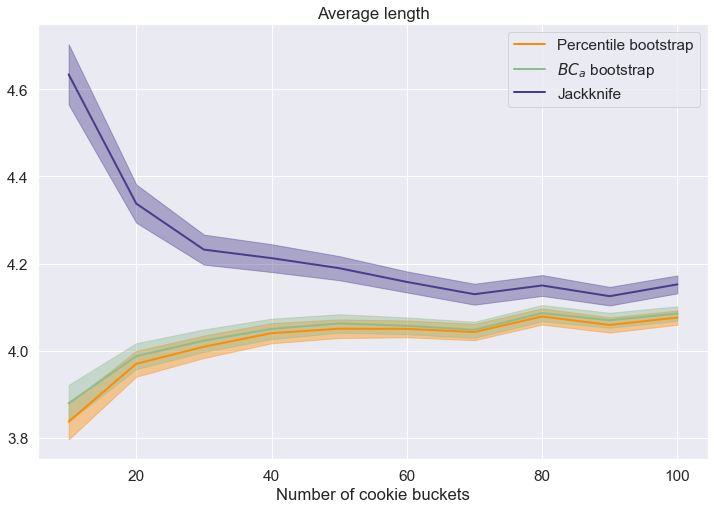

In [607]:
plt.plot(num_of_cookie_buckets, aver_length_percentile, c='DarkOrange', label='Percentile bootstrap')
plt.plot(num_of_cookie_buckets, aver_length_bca, c='DarkSeaGreen', label='$BC_a$ bootstrap')
plt.plot(num_of_cookie_buckets, aver_length_jack, c='darkslateblue',label='Jackknife')

plt.fill_between(num_of_cookie_buckets,aver_length_percentile - 1.96 * std_aver_length_percentile,
    aver_length_percentile + 1.96 * std_aver_length_percentile, color='DarkOrange', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,aver_length_bca - 1.96 * std_aver_length_bca,
    aver_length_bca + 1.96 * std_aver_length_bca, color='DarkSeaGreen', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,aver_length_jack - 1.96 * std_aver_length_jack,
    aver_length_jack + 1.96 * std_aver_length_jack, color='darkslateblue', alpha=0.4)

plt.title('Average length')
plt.xlabel('Number of cookie buckets')
plt.legend()
plt.show()

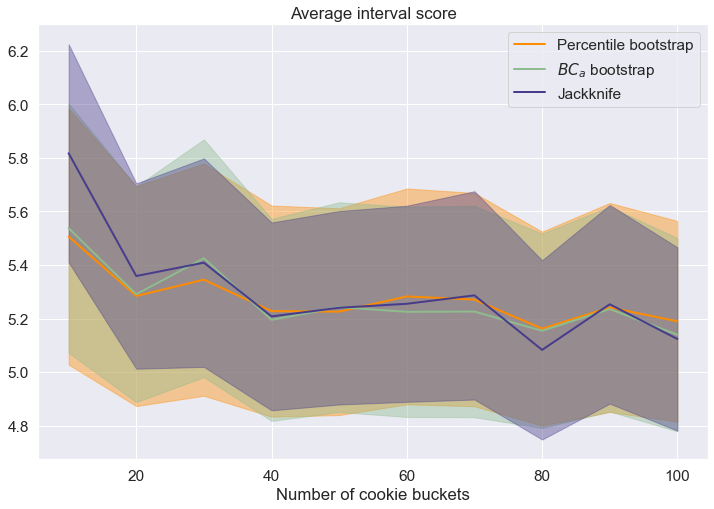

In [608]:
plt.plot(num_of_cookie_buckets, aver_int_score_percentile, c='DarkOrange', label='Percentile bootstrap')
plt.plot(num_of_cookie_buckets, aver_int_score_bca, c='darkseagreen', label='$BC_a$ bootstrap')
plt.plot(num_of_cookie_buckets, aver_int_score_jack, c='darkslateblue',label='Jackknife')

plt.fill_between(num_of_cookie_buckets,aver_int_score_percentile - 1.96 * std_aver_int_score_percentile,
    aver_int_score_percentile + 1.96 * std_aver_int_score_percentile, color='DarkOrange', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,aver_int_score_bca - 1.96 * std_aver_int_score_bca,
    aver_int_score_bca + 1.96 * std_aver_int_score_bca, color='DarkSeaGreen', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,aver_int_score_jack - 1.96 * std_aver_int_score_jack,
    aver_int_score_jack + 1.96 * std_aver_int_score_jack, color='darkslateblue', alpha=0.4)

plt.title('Average interval score')
plt.xlabel('Number of cookie buckets')
plt.legend()
plt.show()

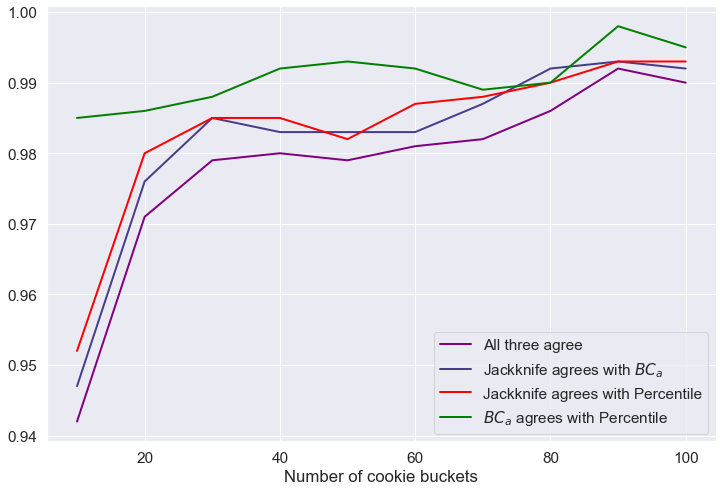

In [471]:
plt.plot(num_of_cookie_buckets, aver_agreed_all_three, c='purple', label='All three agree')
plt.plot(num_of_cookie_buckets, aver_agreed_jack_bca, c='darkslateblue', label='Jackknife agrees with $BC_a$')
plt.plot(num_of_cookie_buckets, aver_agreed_jack_percentile, c='red', label='Jackknife agrees with Percentile')
plt.plot(num_of_cookie_buckets, aver_agreed_bca_percentile, c='green', label='$BC_a$ agrees with Percentile')
plt.xlabel('Number of cookie buckets')
plt.legend()
plt.show()

## Lognormal case

## 95th percentile

In [524]:
lognormal_varying_res_percentile_95=list()
lognormal_varying_res_bc_a_95=list()
lognormal_varying_res_jack_95=list()

lognormal_varying_length_percentile_95=list()
lognormal_varying_length_bc_a_95=list()
lognormal_varying_length_jack_95=list()

lognormal_varying_int_score_percentile_95=list()
lognormal_varying_int_score_bc_a_95=list()
lognormal_varying_int_score_jack_95=list()

lognormal_agreed_jack_bc_a = list()
lognormal_agreed_jack_percentile = list()
lognormal_agreed_bc_a_percentile = list()
lognormal_agreed_all_three = list()

In [525]:
for cur_num_of_cookie_buckets in num_of_cookie_buckets:
    lognormal_varying_res_percentile_95+=[[]]
    lognormal_varying_res_bc_a_95+=[[]]
    lognormal_varying_res_jack_95+=[[]]

    lognormal_varying_length_percentile_95+=[[]]
    lognormal_varying_length_bc_a_95+=[[]]
    lognormal_varying_length_jack_95+=[[]]

    lognormal_varying_int_score_percentile_95+=[[]]
    lognormal_varying_int_score_bc_a_95+=[[]]
    lognormal_varying_int_score_jack_95+=[[]]

    lognormal_agreed_jack_bc_a +=[[]]
    lognormal_agreed_jack_percentile+=[[]]
    lognormal_agreed_bc_a_percentile +=[[]]
    lognormal_agreed_all_three +=[[]]


In [526]:
num_of_sims=1000

In [527]:
for i in range(num_of_sims):
    # generate raw data
    raw_data_treatment = generate_raw_data_lognormal(number_of_users = 1000, mean_param=7,sigma_param=1)
    raw_data_control = generate_raw_data_lognormal(number_of_users = 1000, mean_param=7,sigma_param=1)

    for cur_ind, cur_num_of_cookie_buckets in enumerate(num_of_cookie_buckets):

        # bin raw data and place the clients into cookie buckets
        bucketed_data_treat = get_binned_data_cookie_bucket_level(raw_data_treatment,cur_num_of_cookie_buckets, bins_boundaries)
        bucketed_data_control = get_binned_data_cookie_bucket_level(raw_data_control,cur_num_of_cookie_buckets, bins_boundaries)

        res_percentile = percentile_bootstrap_ci_ratio_cookie_buckets(bucketed_data_treat, bucketed_data_control,
                                            bins_boundaries, 2000, 0.95,
                                            estimator_type='quantile',
                                            quantile=0.95, return_interval=True)

        res_bc_a = bc_a_bootstrap_ratio_cookie_buckets(bucketed_data_treat, bucketed_data_control,
                                            bins_boundaries, 2000, 0.95,
                                            estimator_type='quantile',
                                            quantile=0.95, return_interval=True)
        
        res_jack = jackknife_cookie_bucket_quantile_bucketed(bucketed_data_treat, bucketed_data_control,
                                            bins_boundaries, 0.95,
                                            quantile_to_test= 0.95, return_interval=True)

        # add coverage result
        lognormal_varying_res_percentile_95[cur_ind]+=[res_percentile[0]]
        lognormal_varying_res_bc_a_95[cur_ind]+=[res_bc_a[0]]
        lognormal_varying_res_jack_95[cur_ind]+=[res_jack[0]]

        #add length
        lognormal_varying_length_percentile_95[cur_ind]+=[res_percentile[1][1]-res_percentile[1][0]]
        lognormal_varying_length_bc_a_95[cur_ind]+=[res_bc_a[1][1]-res_bc_a[1][0]]
        lognormal_varying_length_jack_95[cur_ind]+=[res_jack[1][1]-res_jack[1][0]]

        #add scores
        lognormal_varying_int_score_percentile_95[cur_ind]+=[compute_interval_score(res_percentile[1][1],res_percentile[1][0],1-0.95,0)]
        lognormal_varying_int_score_bc_a_95[cur_ind]+=[compute_interval_score(res_bc_a[1][1],res_bc_a[1][0],1-0.95,0)]
        lognormal_varying_int_score_jack_95[cur_ind]+=[compute_interval_score(res_jack[1][1],res_jack[1][0],1-0.95,0)]

        lognormal_agreed_bc_a_percentile[cur_ind]+=[res_bc_a[0]==res_percentile[0]]
        lognormal_agreed_jack_bc_a[cur_ind]+=[res_jack[0]==res_bc_a[0]]
        lognormal_agreed_jack_percentile[cur_ind]+=[res_jack[0]==res_percentile[0]]
        lognormal_agreed_all_three[cur_ind]+=[res_jack[0]==res_percentile[0] == res_bc_a[0]]


In [586]:
lognormal_aver_rej_rate_percentile = np.array([np.mean(cur_sample) for cur_sample in lognormal_varying_res_percentile_95])
lognormal_aver_rej_rate_bca = np.array([np.mean(cur_sample) for cur_sample in lognormal_varying_res_bc_a_95])
lognormal_aver_rej_rate_jack = np.array([np.mean(cur_sample) for cur_sample in lognormal_varying_res_jack_95])

lognormal_aver_length_percentile = np.array([np.mean(cur_sample) for cur_sample in lognormal_varying_length_percentile_95])
lognormal_aver_length_bca = np.array([np.mean(cur_sample) for cur_sample in lognormal_varying_length_bc_a_95])
lognormal_aver_length_jack = np.array([np.mean(cur_sample) for cur_sample in lognormal_varying_length_jack_95])

lognormal_aver_int_score_percentile = np.array([np.mean(cur_sample) for cur_sample in lognormal_varying_int_score_percentile_95])
lognormal_aver_int_score_bca = np.array([np.mean(cur_sample) for cur_sample in lognormal_varying_int_score_bc_a_95])
lognormal_aver_int_score_jack = np.array([np.mean(cur_sample) for cur_sample in lognormal_varying_int_score_jack_95])

lognormal_aver_agreed_jack_bca = np.array([np.mean(cur_sample) for cur_sample in lognormal_agreed_jack_bc_a])
lognormal_aver_agreed_jack_percentile = np.array([np.mean(cur_sample) for cur_sample in lognormal_agreed_jack_percentile])
lognormal_aver_agreed_bca_percentile = np.array([np.mean(cur_sample) for cur_sample in lognormal_agreed_bc_a_percentile])
lognormal_aver_agreed_all_three = np.array([np.mean(cur_sample) for cur_sample in lognormal_agreed_all_three])

In [588]:
std_lognormal_aver_rej_rate_percentile = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in lognormal_varying_res_percentile_95])
std_lognormal_aver_rej_rate_bca = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in lognormal_varying_res_bc_a_95])
std_lognormal_aver_rej_rate_jack = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in lognormal_varying_res_jack_95])

std_lognormal_aver_length_percentile = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in lognormal_varying_length_percentile_95])
std_lognormal_aver_length_bca = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in lognormal_varying_length_bc_a_95])
std_lognormal_aver_length_jack = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in lognormal_varying_length_jack_95])

std_lognormal_aver_int_score_percentile = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in lognormal_varying_int_score_percentile_95])
std_lognormal_aver_int_score_bca = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in lognormal_varying_int_score_bc_a_95])
std_lognormal_aver_int_score_jack = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in lognormal_varying_int_score_jack_95])

std_lognormal_aver_agreed_jack_bca = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in lognormal_agreed_jack_bc_a])
std_lognormal_aver_agreed_jack_percentile = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in lognormal_agreed_jack_percentile])
std_lognormal_aver_agreed_bca_percentile = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in lognormal_agreed_bc_a_percentile])
std_lognormal_aver_agreed_all_three = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in lognormal_agreed_all_three])

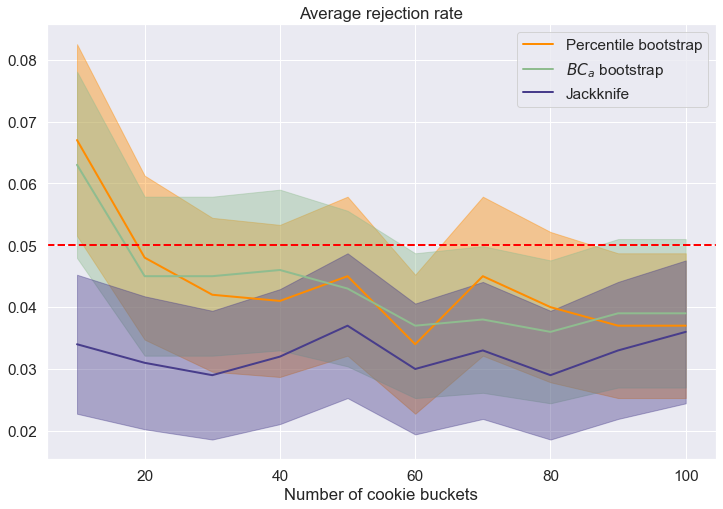

In [601]:
plt.plot(num_of_cookie_buckets, lognormal_aver_rej_rate_percentile, c='DarkOrange', label='Percentile bootstrap')
plt.plot(num_of_cookie_buckets, lognormal_aver_rej_rate_bca, c='DarkSeaGreen', label='$BC_a$ bootstrap')
plt.plot(num_of_cookie_buckets, lognormal_aver_rej_rate_jack, c='darkslateblue', label='Jackknife')

plt.fill_between(num_of_cookie_buckets,lognormal_aver_rej_rate_percentile - 1.96 * std_lognormal_aver_rej_rate_percentile,
    lognormal_aver_rej_rate_percentile + 1.96*std_lognormal_aver_rej_rate_percentile, color='DarkOrange', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,lognormal_aver_rej_rate_bca - 1.96 * std_lognormal_aver_rej_rate_bca,
    lognormal_aver_rej_rate_bca + 1.96*std_lognormal_aver_rej_rate_bca, color='DarkSeaGreen', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,lognormal_aver_rej_rate_jack - 1.96 * std_lognormal_aver_rej_rate_jack,
    lognormal_aver_rej_rate_jack + 1.96*std_lognormal_aver_rej_rate_jack, color='darkslateblue', alpha=0.4)

plt.axhline(0.05, color='red', linestyle='dashed')
plt.title('Average rejection rate')
plt.xlabel('Number of cookie buckets')
plt.legend()
plt.show()

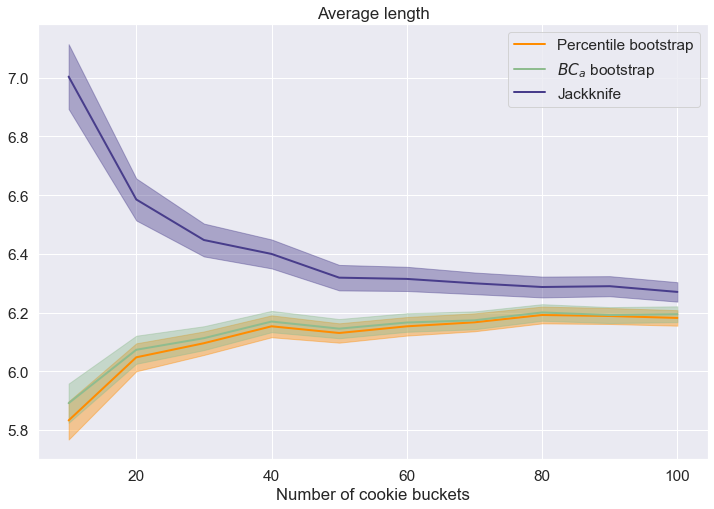

In [602]:
plt.plot(num_of_cookie_buckets, lognormal_aver_length_percentile, c='DarkOrange', label='Percentile bootstrap')
plt.plot(num_of_cookie_buckets, lognormal_aver_length_bca, c='DarkSeaGreen', label='$BC_a$ bootstrap')
plt.plot(num_of_cookie_buckets, lognormal_aver_length_jack, c='darkslateblue',label='Jackknife')

plt.fill_between(num_of_cookie_buckets,lognormal_aver_length_percentile - 1.96 * std_lognormal_aver_length_percentile,
    lognormal_aver_length_percentile + 1.96*std_lognormal_aver_length_percentile, color='DarkOrange', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,lognormal_aver_length_bca - 1.96 * std_lognormal_aver_length_bca,
    lognormal_aver_length_bca + 1.96*std_lognormal_aver_length_bca, color='DarkSeaGreen', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,lognormal_aver_length_jack - 1.96 * std_lognormal_aver_length_jack,
    lognormal_aver_length_jack + 1.96*std_lognormal_aver_length_jack, color='darkslateblue', alpha=0.4)

plt.title('Average length')
plt.xlabel('Number of cookie buckets')
plt.legend()
plt.show()

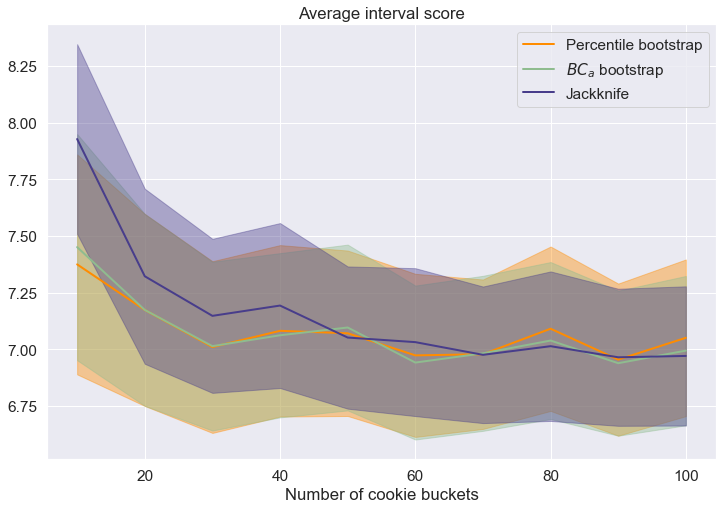

In [603]:
plt.plot(num_of_cookie_buckets, lognormal_aver_int_score_percentile, c='DarkOrange', label='Percentile bootstrap')
plt.plot(num_of_cookie_buckets, lognormal_aver_int_score_bca, c='DarkSeaGreen', label='$BC_a$ bootstrap')
plt.plot(num_of_cookie_buckets, lognormal_aver_int_score_jack, c='darkslateblue',label='Jackknife')

plt.fill_between(num_of_cookie_buckets,lognormal_aver_int_score_percentile - 1.96 * std_lognormal_aver_int_score_percentile,
    lognormal_aver_int_score_percentile + 1.96*std_lognormal_aver_int_score_percentile, color='DarkOrange', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,lognormal_aver_int_score_bca - 1.96 * std_lognormal_aver_int_score_bca,
    lognormal_aver_int_score_bca + 1.96*std_lognormal_aver_int_score_bca, color='DarkSeaGreen', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,lognormal_aver_int_score_jack - 1.96 * std_lognormal_aver_int_score_jack,
    lognormal_aver_int_score_jack + 1.96*std_lognormal_aver_int_score_jack, color='darkslateblue', alpha=0.4)

plt.title('Average interval score')
plt.xlabel('Number of cookie buckets')
plt.legend()
plt.show()

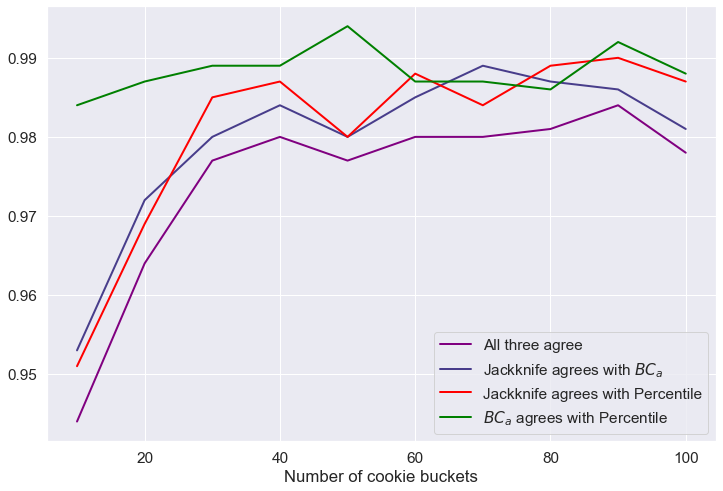

In [533]:
plt.plot(num_of_cookie_buckets, lognormal_aver_agreed_all_three, c='purple', label='All three agree')
plt.plot(num_of_cookie_buckets, lognormal_aver_agreed_jack_bca, c='darkslateblue', label='Jackknife agrees with $BC_a$')
plt.plot(num_of_cookie_buckets, lognormal_aver_agreed_jack_percentile, c='red', label='Jackknife agrees with Percentile')
plt.plot(num_of_cookie_buckets, lognormal_aver_agreed_bca_percentile, c='green', label='$BC_a$ agrees with Percentile')
plt.xlabel('Number of cookie buckets')
plt.legend()
plt.show()

## Median

In [628]:
lognormal_varying_res_percentile_50=list()
lognormal_varying_res_bc_a_50=list()
lognormal_varying_res_jack_50=list()

lognormal_varying_length_percentile_50=list()
lognormal_varying_length_bc_a_50=list()
lognormal_varying_length_jack_50=list()

lognormal_varying_int_score_percentile_50=list()
lognormal_varying_int_score_bc_a_50=list()
lognormal_varying_int_score_jack_50=list()

lognormal_agreed_jack_bc_a_50 = list()
lognormal_agreed_jack_percentile_50 = list()
lognormal_agreed_bc_a_percentile_50 = list()
lognormal_agreed_all_three_50 = list()

lognormal_timing_bca_50 = list()
lognormal_timing_percentile_50 = list()
lognormal_timing_jack_50 = list()

In [678]:
num_of_cookie_buckets

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [629]:
for cur_num_of_cookie_buckets in num_of_cookie_buckets:
    lognormal_varying_res_percentile_50+=[[]]
    lognormal_varying_res_bc_a_50+=[[]]
    lognormal_varying_res_jack_50+=[[]]

    lognormal_varying_length_percentile_50+=[[]]
    lognormal_varying_length_bc_a_50+=[[]]
    lognormal_varying_length_jack_50+=[[]]

    lognormal_varying_int_score_percentile_50+=[[]]
    lognormal_varying_int_score_bc_a_50+=[[]]
    lognormal_varying_int_score_jack_50+=[[]]

    lognormal_agreed_jack_bc_a_50 +=[[]]
    lognormal_agreed_jack_percentile_50+=[[]]
    lognormal_agreed_bc_a_percentile_50 +=[[]]
    lognormal_agreed_all_three_50 +=[[]]

    lognormal_timing_bca_50 +=[[]]
    lognormal_timing_percentile_50 +=[[]]
    lognormal_timing_jack_50 +=[[]]


In [630]:
for i in range(num_of_sims):
    # generate raw data
    raw_data_treatment = generate_raw_data_lognormal(number_of_users = 1000, mean_param=7,sigma_param=1)
    raw_data_control = generate_raw_data_lognormal(number_of_users = 1000, mean_param=7,sigma_param=1)

    for cur_ind, cur_num_of_cookie_buckets in enumerate(num_of_cookie_buckets):

        # bin raw data and place the clients into cookie buckets
        bucketed_data_treat = get_binned_data_cookie_bucket_level(raw_data_treatment,cur_num_of_cookie_buckets, bins_boundaries)
        bucketed_data_control = get_binned_data_cookie_bucket_level(raw_data_control,cur_num_of_cookie_buckets, bins_boundaries)

        start_time=time.time()

        res_percentile = percentile_bootstrap_ci_ratio_cookie_buckets(bucketed_data_treat, bucketed_data_control,
                                            bins_boundaries, 2000, 0.95,
                                            estimator_type='quantile',
                                            quantile=0.5, return_interval=True)

        lognormal_timing_percentile_50[cur_ind]+=[time.time()-start_time]
        start_time=time.time()

        res_bc_a = bc_a_bootstrap_ratio_cookie_buckets(bucketed_data_treat, bucketed_data_control,
                                            bins_boundaries, 2000, 0.95,
                                            estimator_type='quantile',
                                            quantile=0.5, return_interval=True)
        lognormal_timing_bca_50[cur_ind]+=[time.time()-start_time]
        start_time=time.time()

        res_jack = jackknife_cookie_bucket_quantile_bucketed(bucketed_data_treat, bucketed_data_control,
                                            bins_boundaries, 0.95,
                                            quantile_to_test= 0.5, return_interval=True)

        lognormal_timing_jack_50[cur_ind]+=[time.time()-start_time]
        # add coverage result
        lognormal_varying_res_percentile_50[cur_ind]+=[res_percentile[0]]
        lognormal_varying_res_bc_a_50[cur_ind]+=[res_bc_a[0]]
        lognormal_varying_res_jack_50[cur_ind]+=[res_jack[0]]

        #add length
        lognormal_varying_length_percentile_50[cur_ind]+=[res_percentile[1][1]-res_percentile[1][0]]
        lognormal_varying_length_bc_a_50[cur_ind]+=[res_bc_a[1][1]-res_bc_a[1][0]]
        lognormal_varying_length_jack_50[cur_ind]+=[res_jack[1][1]-res_jack[1][0]]

        #add scores
        lognormal_varying_int_score_percentile_50[cur_ind]+=[compute_interval_score(res_percentile[1][1],res_percentile[1][0],1-0.95,0)]
        lognormal_varying_int_score_bc_a_50[cur_ind]+=[compute_interval_score(res_bc_a[1][1],res_bc_a[1][0],1-0.95,0)]
        lognormal_varying_int_score_jack_50[cur_ind]+=[compute_interval_score(res_jack[1][1],res_jack[1][0],1-0.95,0)]

        lognormal_agreed_bc_a_percentile_50[cur_ind]+=[res_bc_a[0]==res_percentile[0]]
        lognormal_agreed_jack_bc_a_50[cur_ind]+=[res_jack[0]==res_bc_a[0]]
        lognormal_agreed_jack_percentile_50[cur_ind]+=[res_jack[0]==res_percentile[0]]
        lognormal_agreed_all_three_50[cur_ind]+=[res_jack[0]==res_percentile[0] == res_bc_a[0]]


In [650]:
lognormal_aver_rej_rate_percentile_50 = np.array([np.mean(cur_sample) for cur_sample in lognormal_varying_res_percentile_50])
lognormal_aver_rej_rate_bca_50 = np.array([np.mean(cur_sample) for cur_sample in lognormal_varying_res_bc_a_50])
lognormal_aver_rej_rate_jack_50 = np.array([np.mean(cur_sample) for cur_sample in lognormal_varying_res_jack_50])

lognormal_aver_length_percentile_50 = np.array([np.mean(cur_sample) for cur_sample in lognormal_varying_length_percentile_50])
lognormal_aver_length_bca_50 = np.array([np.mean(cur_sample) for cur_sample in lognormal_varying_length_bc_a_50])
lognormal_aver_length_jack_50 = np.array([np.mean(cur_sample) for cur_sample in lognormal_varying_length_jack_50])

lognormal_aver_int_score_percentile_50 = np.array([np.mean(cur_sample) for cur_sample in lognormal_varying_int_score_percentile_50])
lognormal_aver_int_score_bca_50 = np.array([np.mean(cur_sample) for cur_sample in lognormal_varying_int_score_bc_a_50])
lognormal_aver_int_score_jack_50 = np.array([np.mean(cur_sample) for cur_sample in lognormal_varying_int_score_jack_50])

lognormal_aver_agreed_jack_bca_50 = np.array([np.mean(cur_sample) for cur_sample in lognormal_agreed_jack_bc_a_50])
lognormal_aver_agreed_jack_percentile_50 = np.array([np.mean(cur_sample) for cur_sample in lognormal_agreed_jack_percentile_50])
lognormal_aver_agreed_bca_percentile_50 = np.array([np.mean(cur_sample) for cur_sample in lognormal_agreed_bc_a_percentile_50])
lognormal_aver_agreed_all_three_50 = np.array([np.mean(cur_sample) for cur_sample in lognormal_agreed_all_three_50])

lognormal_aver_timing_percentile_50 = np.array([np.mean(cur_sample) for cur_sample in lognormal_timing_percentile_50])
lognormal_aver_timing_bca_50 = np.array([np.mean(cur_sample) for cur_sample in lognormal_timing_bca_50])
lognormal_aver_timing_jack_50 = np.array([np.mean(cur_sample) for cur_sample in lognormal_timing_jack_50])

In [651]:
# deviations normalized by number of sims
std_lognormal_aver_rej_rate_percentile_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in lognormal_varying_res_percentile_50])
std_lognormal_aver_rej_rate_bca_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in lognormal_varying_res_bc_a_50])
std_lognormal_aver_rej_rate_jack_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in lognormal_varying_res_jack_50])

std_lognormal_aver_length_percentile_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in lognormal_varying_length_percentile_50])
std_lognormal_aver_length_bca_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in lognormal_varying_length_bc_a_50])
std_lognormal_aver_length_jack_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in lognormal_varying_length_jack_50])

std_lognormal_aver_int_score_percentile_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in lognormal_varying_int_score_percentile_50])
std_lognormal_aver_int_score_bca_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in lognormal_varying_int_score_bc_a_50])
std_lognormal_aver_int_score_jack_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in lognormal_varying_int_score_jack_50])

std_lognormal_aver_agreed_jack_bca_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in lognormal_agreed_jack_bc_a_50])
std_lognormal_aver_agreed_jack_percentile_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in lognormal_agreed_jack_percentile_50])
std_lognormal_aver_agreed_bca_percentile_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in lognormal_agreed_bc_a_percentile_50])
std_lognormal_aver_agreed_all_three_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in lognormal_agreed_all_three_50])

std_lognormal_aver_timing_percentile_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in lognormal_timing_percentile_50])
std_lognormal_aver_timing_bca_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in lognormal_timing_bca_50])
std_lognormal_aver_timing_jack_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in lognormal_timing_jack_50])

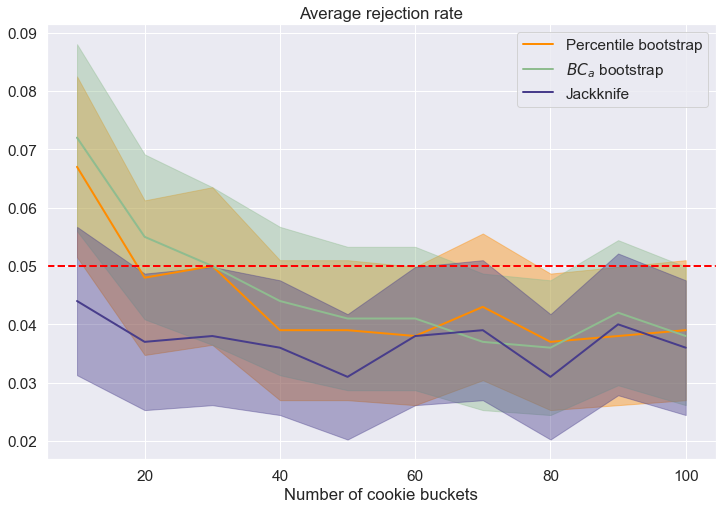

In [683]:
plt.plot(num_of_cookie_buckets, lognormal_aver_rej_rate_percentile_50, c='DarkOrange', label='Percentile bootstrap')
plt.plot(num_of_cookie_buckets, lognormal_aver_rej_rate_bca_50,  c='DarkSeaGreen', label='$BC_a$ bootstrap')
plt.plot(num_of_cookie_buckets, lognormal_aver_rej_rate_jack_50,c='darkslateblue', label='Jackknife')

plt.fill_between(num_of_cookie_buckets,lognormal_aver_rej_rate_percentile_50 - 1.96 * std_lognormal_aver_rej_rate_percentile_50,
    lognormal_aver_rej_rate_percentile_50 + 1.96*std_lognormal_aver_rej_rate_percentile_50, color='DarkOrange', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,lognormal_aver_rej_rate_bca_50 - 1.96 * std_lognormal_aver_rej_rate_bca_50,
    lognormal_aver_rej_rate_bca_50 + 1.96*std_lognormal_aver_rej_rate_bca_50, color='DarkSeaGreen', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,lognormal_aver_rej_rate_jack_50 - 1.96 * std_lognormal_aver_rej_rate_jack_50,
    lognormal_aver_rej_rate_jack_50 + 1.96*std_lognormal_aver_rej_rate_jack_50, color='darkslateblue', alpha=0.4)

plt.axhline(0.05, color='red', linestyle='dashed')
plt.title('Average rejection rate')
plt.xlabel('Number of cookie buckets')
plt.legend()
plt.savefig('comparison_rej_rate.png', bbox_inches='tight')
plt.show()

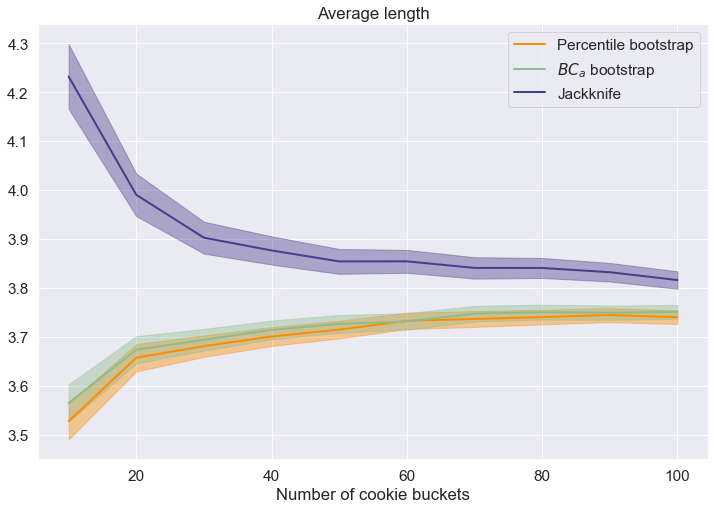

In [684]:
plt.plot(num_of_cookie_buckets, lognormal_aver_length_percentile_50, c='DarkOrange', label='Percentile bootstrap')
plt.plot(num_of_cookie_buckets, lognormal_aver_length_bca_50, c='DarkSeaGreen', label='$BC_a$ bootstrap')
plt.plot(num_of_cookie_buckets, lognormal_aver_length_jack_50, c='darkslateblue',label='Jackknife')

plt.fill_between(num_of_cookie_buckets,lognormal_aver_length_percentile_50 - 1.96 * std_lognormal_aver_length_percentile_50,
    lognormal_aver_length_percentile_50 + 1.96*std_lognormal_aver_length_percentile_50, color='DarkOrange', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,lognormal_aver_length_bca_50 - 1.96 * std_lognormal_aver_length_bca_50,
    lognormal_aver_length_bca_50 + 1.96*std_lognormal_aver_length_bca_50, color='DarkSeaGreen', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,lognormal_aver_length_jack_50 - 1.96 * std_lognormal_aver_length_jack_50,
    lognormal_aver_length_jack_50 + 1.96*std_lognormal_aver_length_jack_50, color='darkslateblue', alpha=0.4)

plt.title('Average length')
plt.xlabel('Number of cookie buckets')
plt.legend()
plt.savefig('comparison_length.png', bbox_inches='tight')
plt.show()

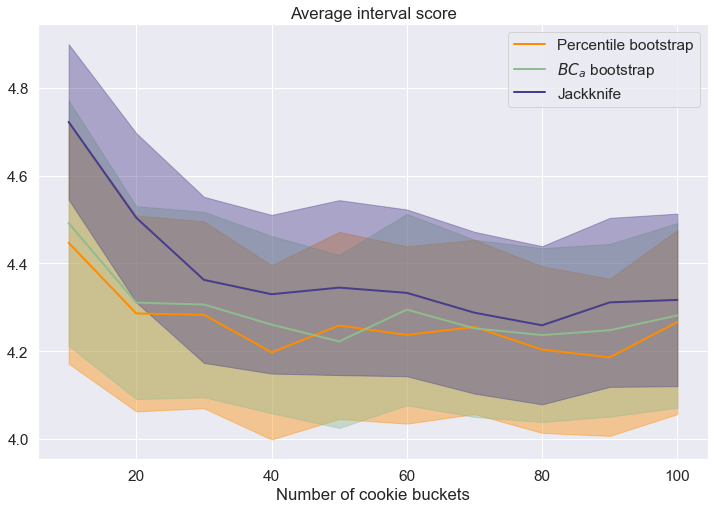

In [685]:
plt.plot(num_of_cookie_buckets, lognormal_aver_int_score_percentile_50, c='DarkOrange', label='Percentile bootstrap')
plt.plot(num_of_cookie_buckets, lognormal_aver_int_score_bca_50, c='DarkSeaGreen', label='$BC_a$ bootstrap')
plt.plot(num_of_cookie_buckets, lognormal_aver_int_score_jack_50, c='darkslateblue',label='Jackknife')

plt.fill_between(num_of_cookie_buckets,lognormal_aver_int_score_percentile_50 - 1.96 * std_lognormal_aver_int_score_percentile_50,
    lognormal_aver_int_score_percentile_50 + 1.96*std_lognormal_aver_int_score_percentile_50, color='DarkOrange', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,lognormal_aver_int_score_bca_50 - 1.96 * std_lognormal_aver_int_score_bca_50,
    lognormal_aver_int_score_bca_50 + 1.96*std_lognormal_aver_int_score_bca_50, color='DarkSeaGreen', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,lognormal_aver_int_score_jack_50 - 1.96 * std_lognormal_aver_int_score_jack_50,
    lognormal_aver_int_score_jack_50 + 1.96*std_lognormal_aver_int_score_jack_50, color='darkslateblue', alpha=0.4)


plt.title('Average interval score')
plt.xlabel('Number of cookie buckets')
plt.legend()
plt.savefig('comparison_int_score.png', bbox_inches='tight')
plt.show()

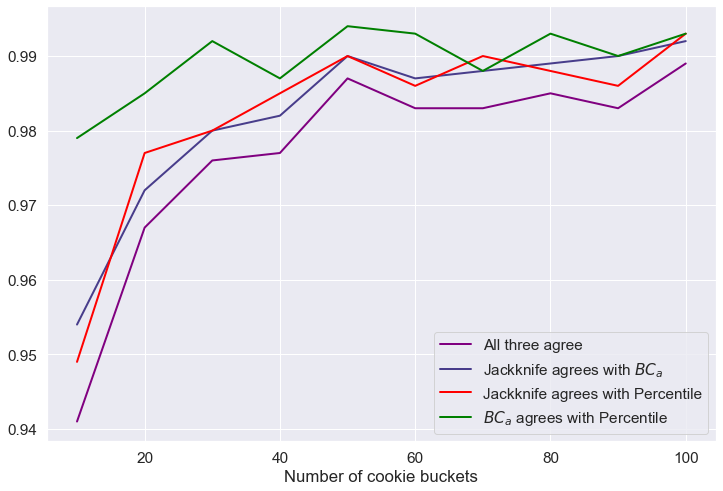

In [655]:
plt.plot(num_of_cookie_buckets, lognormal_aver_agreed_all_three_50, c='purple', label='All three agree')
plt.plot(num_of_cookie_buckets, lognormal_aver_agreed_jack_bca_50, c='darkslateblue', label='Jackknife agrees with $BC_a$')
plt.plot(num_of_cookie_buckets, lognormal_aver_agreed_jack_percentile_50, c='red', label='Jackknife agrees with Percentile')
plt.plot(num_of_cookie_buckets, lognormal_aver_agreed_bca_percentile_50, c='green', label='$BC_a$ agrees with Percentile')
plt.xlabel('Number of cookie buckets')
plt.legend()
plt.show()

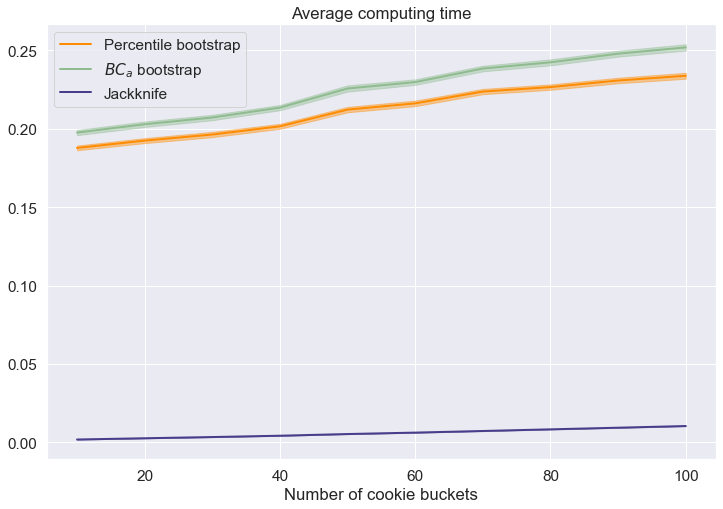

In [682]:
plt.plot(num_of_cookie_buckets, lognormal_aver_timing_percentile_50, c='DarkOrange', label='Percentile bootstrap')
plt.plot(num_of_cookie_buckets, lognormal_aver_timing_bca_50, c='DarkSeaGreen', label='$BC_a$ bootstrap')
plt.plot(num_of_cookie_buckets, lognormal_aver_timing_jack_50, c='darkslateblue',label='Jackknife')

plt.fill_between(num_of_cookie_buckets,lognormal_aver_timing_percentile_50 - 1.96 * std_lognormal_aver_timing_percentile_50,
    lognormal_aver_timing_percentile_50 + 1.96*std_lognormal_aver_timing_percentile_50, color='DarkOrange', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,lognormal_aver_timing_bca_50 - 1.96 * std_lognormal_aver_timing_bca_50,
    lognormal_aver_timing_bca_50 + 1.96*std_lognormal_aver_timing_bca_50, color='DarkSeaGreen', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,lognormal_aver_timing_jack_50 - 1.96 * std_lognormal_aver_timing_jack_50,
    lognormal_aver_timing_jack_50 + 1.96*std_lognormal_aver_timing_jack_50, color='darkslateblue', alpha=0.4)


plt.title('Average computing time')
plt.xlabel('Number of cookie buckets')
plt.legend()
plt.savefig('comparison_comp_time.pdf', bbox_inches='tight')
plt.show()

## 99-th percentile

In [615]:
lognormal_varying_res_percentile_99=list()
lognormal_varying_res_bc_a_99=list()
lognormal_varying_res_jack_99=list()

lognormal_varying_length_percentile_99=list()
lognormal_varying_length_bc_a_99=list()
lognormal_varying_length_jack_99=list()

lognormal_varying_int_score_percentile_99=list()
lognormal_varying_int_score_bc_a_99=list()
lognormal_varying_int_score_jack_99=list()

lognormal_agreed_jack_bc_a_99 = list()
lognormal_agreed_jack_percentile_99 = list()
lognormal_agreed_bc_a_percentile_99 = list()
lognormal_agreed_all_three_99 = list()

lognormal_timing_bca_99 = list()
lognormal_timing_percentile_99 = list()
lognormal_timing_jackknife_99 = list()

In [616]:
for cur_num_of_cookie_buckets in num_of_cookie_buckets:
    lognormal_varying_res_percentile_99+=[[]]
    lognormal_varying_res_bc_a_99+=[[]]
    lognormal_varying_res_jack_99+=[[]]

    lognormal_varying_length_percentile_99+=[[]]
    lognormal_varying_length_bc_a_99+=[[]]
    lognormal_varying_length_jack_99+=[[]]

    lognormal_varying_int_score_percentile_99+=[[]]
    lognormal_varying_int_score_bc_a_99+=[[]]
    lognormal_varying_int_score_jack_99+=[[]]

    lognormal_agreed_jack_bc_a_99 +=[[]]
    lognormal_agreed_jack_percentile_99+=[[]]
    lognormal_agreed_bc_a_percentile_99 +=[[]]
    lognormal_agreed_all_three_99 +=[[]]

    lognormal_timing_bca_99 +=[[]]
    lognormal_timing_percentile_99 +=[[]]
    lognormal_timing_jackknife_99 +=[[]]

In [617]:
for i in range(num_of_sims):
    # generate raw data
    raw_data_treatment = generate_raw_data_lognormal(number_of_users = 1000, mean_param=7,sigma_param=1)
    raw_data_control = generate_raw_data_lognormal(number_of_users = 1000, mean_param=7,sigma_param=1)

    for cur_ind, cur_num_of_cookie_buckets in enumerate(num_of_cookie_buckets):

        # bin raw data and place the clients into cookie buckets
        bucketed_data_treat = get_binned_data_cookie_bucket_level(raw_data_treatment,cur_num_of_cookie_buckets, bins_boundaries)
        bucketed_data_control = get_binned_data_cookie_bucket_level(raw_data_control,cur_num_of_cookie_buckets, bins_boundaries)

        start_time = time.time()

        res_percentile = percentile_bootstrap_ci_ratio_cookie_buckets(bucketed_data_treat, bucketed_data_control,
                                            bins_boundaries, 2000, 0.95,
                                            estimator_type='quantile',
                                            quantile=0.99, return_interval=True)

        lognormal_timing_percentile_99[cur_ind]+=[time.time()-start_time]

        start_time = time.time()

        res_bc_a = bc_a_bootstrap_ratio_cookie_buckets(bucketed_data_treat, bucketed_data_control,
                                            bins_boundaries, 2000, 0.95,
                                            estimator_type='quantile',
                                            quantile=0.99, return_interval=True)
        
        lognormal_timing_bca_99[cur_ind]+=[time.time()-start_time]

        start_time = time.time()

        res_jack = jackknife_cookie_bucket_quantile_bucketed(bucketed_data_treat, bucketed_data_control,
                                            bins_boundaries, 0.95,
                                            quantile_to_test= 0.99, return_interval=True)

        lognormal_timing_jackknife_99[cur_ind]+=[time.time()-start_time]

        # add coverage result
        lognormal_varying_res_percentile_99[cur_ind]+=[res_percentile[0]]
        lognormal_varying_res_bc_a_99[cur_ind]+=[res_bc_a[0]]
        lognormal_varying_res_jack_99[cur_ind]+=[res_jack[0]]

        #add length
        lognormal_varying_length_percentile_99[cur_ind]+=[res_percentile[1][1]-res_percentile[1][0]]
        lognormal_varying_length_bc_a_99[cur_ind]+=[res_bc_a[1][1]-res_bc_a[1][0]]
        lognormal_varying_length_jack_99[cur_ind]+=[res_jack[1][1]-res_jack[1][0]]

        #add scores
        lognormal_varying_int_score_percentile_99[cur_ind]+=[compute_interval_score(res_percentile[1][1],res_percentile[1][0],1-0.95,0)]
        lognormal_varying_int_score_bc_a_99[cur_ind]+=[compute_interval_score(res_bc_a[1][1],res_bc_a[1][0],1-0.95,0)]
        lognormal_varying_int_score_jack_99[cur_ind]+=[compute_interval_score(res_jack[1][1],res_jack[1][0],1-0.95,0)]

        lognormal_agreed_bc_a_percentile_99[cur_ind]+=[res_bc_a[0]==res_percentile[0]]
        lognormal_agreed_jack_bc_a_99[cur_ind]+=[res_jack[0]==res_bc_a[0]]
        lognormal_agreed_jack_percentile_99[cur_ind]+=[res_jack[0]==res_percentile[0]]
        lognormal_agreed_all_three_99[cur_ind]+=[res_jack[0]==res_percentile[0] == res_bc_a[0]]


In [618]:
lognormal_aver_rej_rate_percentile_99 = np.array([np.mean(cur_sample) for cur_sample in lognormal_varying_res_percentile_99])
lognormal_aver_rej_rate_bca_99 = np.array([np.mean(cur_sample) for cur_sample in lognormal_varying_res_bc_a_99])
lognormal_aver_rej_rate_jack_99 = np.array([np.mean(cur_sample) for cur_sample in lognormal_varying_res_jack_99])

lognormal_aver_length_percentile_99 = np.array([np.mean(cur_sample) for cur_sample in lognormal_varying_length_percentile_99])
lognormal_aver_length_bca_99 = np.array([np.mean(cur_sample) for cur_sample in lognormal_varying_length_bc_a_99])
lognormal_aver_length_jack_99 = np.array([np.mean(cur_sample) for cur_sample in lognormal_varying_length_jack_99])

lognormal_aver_int_score_percentile_99 = np.array([np.mean(cur_sample) for cur_sample in lognormal_varying_int_score_percentile_99])
lognormal_aver_int_score_bca_99 = np.array([np.mean(cur_sample) for cur_sample in lognormal_varying_int_score_bc_a_99])
lognormal_aver_int_score_jack_99 = np.array([np.mean(cur_sample) for cur_sample in lognormal_varying_int_score_jack_99])

lognormal_aver_agreed_jack_bca_99 = np.array([np.mean(cur_sample) for cur_sample in lognormal_agreed_jack_bc_a_99])
lognormal_aver_agreed_jack_percentile_99 = np.array([np.mean(cur_sample) for cur_sample in lognormal_agreed_jack_percentile_99])
lognormal_aver_agreed_bca_percentile_99 = np.array([np.mean(cur_sample) for cur_sample in lognormal_agreed_bc_a_percentile_99])
lognormal_aver_agreed_all_three_99 = np.array([np.mean(cur_sample) for cur_sample in lognormal_agreed_all_three_99])

lognormal_aver_timing_percentile_99 = np.array([np.mean(cur_sample) for cur_sample in lognormal_timing_percentile_99])
lognormal_aver_timing_bca_99 = np.array([np.mean(cur_sample) for cur_sample in lognormal_timing_bca_99])
lognormal_aver_timing_jack_99 = np.array([np.mean(cur_sample) for cur_sample in lognormal_timing_jackknife_99])

In [619]:
# deviations normalized by number of sims
std_lognormal_aver_rej_rate_percentile_99 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in lognormal_varying_res_percentile_99])
std_lognormal_aver_rej_rate_bca_99 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in lognormal_varying_res_bc_a_99])
std_lognormal_aver_rej_rate_jack_99 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in lognormal_varying_res_jack_99])

std_lognormal_aver_length_percentile_99 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in lognormal_varying_length_percentile_99])
std_lognormal_aver_length_bca_99 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in lognormal_varying_length_bc_a_99])
std_lognormal_aver_length_jack_99 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in lognormal_varying_length_jack_99])

std_lognormal_aver_int_score_percentile_99 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in lognormal_varying_int_score_percentile_99])
std_lognormal_aver_int_score_bca_99 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in lognormal_varying_int_score_bc_a_99])
std_lognormal_aver_int_score_jack_99 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in lognormal_varying_int_score_jack_99])

std_lognormal_aver_agreed_jack_bca_99 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in lognormal_agreed_jack_bc_a_99])
std_lognormal_aver_agreed_jack_percentile_99 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in lognormal_agreed_jack_percentile_99])
std_lognormal_aver_agreed_bca_percentile_99 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in lognormal_agreed_bc_a_percentile_99])
std_lognormal_aver_agreed_all_three_99 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in lognormal_agreed_all_three_99])

std_lognormal_aver_timing_percentile_99 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in lognormal_timing_percentile_99])
std_lognormal_aver_timing_bca_99 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in lognormal_timing_bca_99])
std_lognormal_aver_timing_jack_99 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in lognormal_timing_jackknife_99])


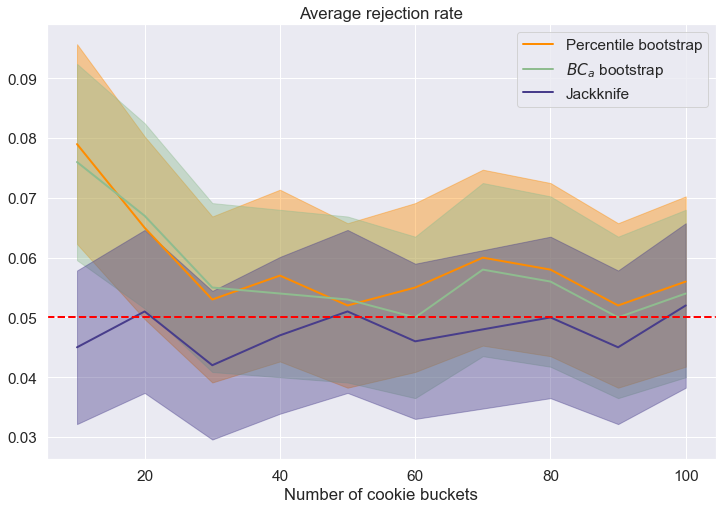

In [620]:
plt.plot(num_of_cookie_buckets, lognormal_aver_rej_rate_percentile_99, c='DarkOrange', label='Percentile bootstrap')
plt.plot(num_of_cookie_buckets, lognormal_aver_rej_rate_bca_99,  c='DarkSeaGreen', label='$BC_a$ bootstrap')
plt.plot(num_of_cookie_buckets, lognormal_aver_rej_rate_jack_99,c='darkslateblue', label='Jackknife')

plt.fill_between(num_of_cookie_buckets,lognormal_aver_rej_rate_percentile_99 - 1.96 * std_lognormal_aver_rej_rate_percentile_99,
    lognormal_aver_rej_rate_percentile_99 + 1.96*std_lognormal_aver_rej_rate_percentile_99, color='DarkOrange', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,lognormal_aver_rej_rate_bca_99 - 1.96 * std_lognormal_aver_rej_rate_bca_99,
    lognormal_aver_rej_rate_bca_99 + 1.96*std_lognormal_aver_rej_rate_bca_99, color='DarkSeaGreen', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,lognormal_aver_rej_rate_jack_99 - 1.96 * std_lognormal_aver_rej_rate_jack_99,
    lognormal_aver_rej_rate_jack_99 + 1.96*std_lognormal_aver_rej_rate_jack_99, color='darkslateblue', alpha=0.4)


plt.axhline(0.05, color='red', linestyle='dashed')
plt.title('Average rejection rate')
plt.xlabel('Number of cookie buckets')
plt.legend()
plt.show()


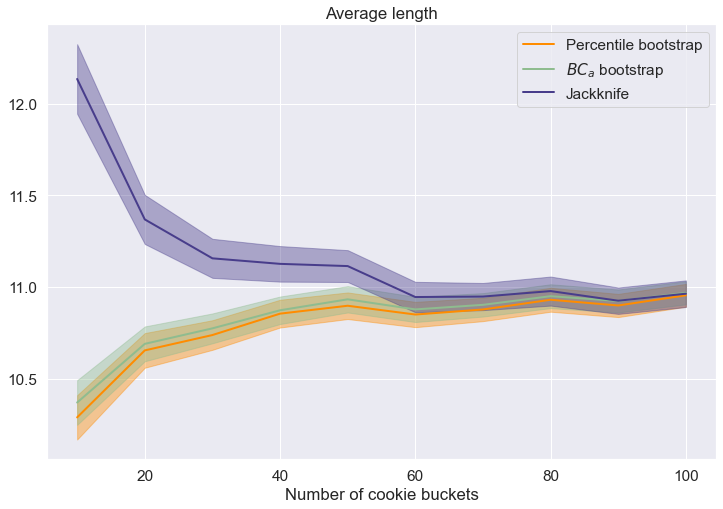

In [621]:
plt.plot(num_of_cookie_buckets, lognormal_aver_length_percentile_99, c='DarkOrange', label='Percentile bootstrap')
plt.plot(num_of_cookie_buckets, lognormal_aver_length_bca_99, c='DarkSeaGreen', label='$BC_a$ bootstrap')
plt.plot(num_of_cookie_buckets, lognormal_aver_length_jack_99, c='darkslateblue',label='Jackknife')

plt.fill_between(num_of_cookie_buckets,lognormal_aver_length_percentile_99 - 1.96 * std_lognormal_aver_length_percentile_99,
    lognormal_aver_length_percentile_99 + 1.96*std_lognormal_aver_length_percentile_99, color='DarkOrange', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,lognormal_aver_length_bca_99 - 1.96 * std_lognormal_aver_length_bca_99,
    lognormal_aver_length_bca_99 + 1.96*std_lognormal_aver_length_bca_99, color='DarkSeaGreen', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,lognormal_aver_length_jack_99 - 1.96 * std_lognormal_aver_length_jack_99,
    lognormal_aver_length_jack_99 + 1.96*std_lognormal_aver_length_jack_99, color='darkslateblue', alpha=0.4)


plt.title('Average length')
plt.xlabel('Number of cookie buckets')
plt.legend()
plt.show()

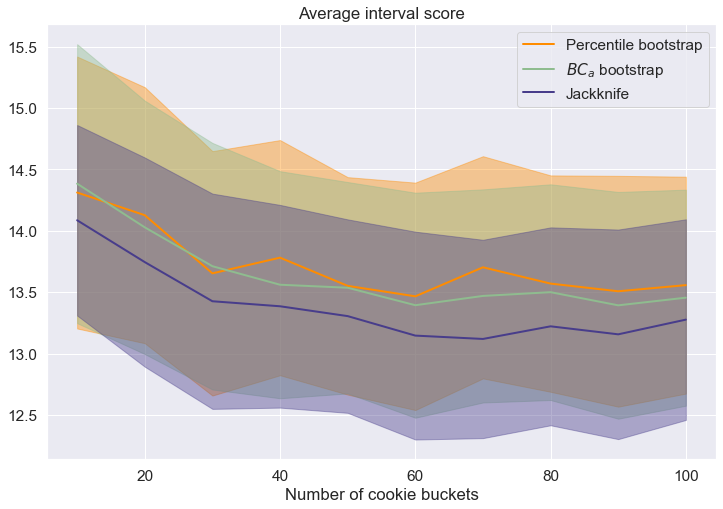

In [622]:
plt.plot(num_of_cookie_buckets, lognormal_aver_int_score_percentile_99, c='DarkOrange', label='Percentile bootstrap')
plt.plot(num_of_cookie_buckets, lognormal_aver_int_score_bca_99, c='DarkSeaGreen', label='$BC_a$ bootstrap')
plt.plot(num_of_cookie_buckets, lognormal_aver_int_score_jack_99, c='darkslateblue',label='Jackknife')

plt.fill_between(num_of_cookie_buckets,lognormal_aver_int_score_percentile_99 - 1.96 * std_lognormal_aver_int_score_percentile_99,
    lognormal_aver_int_score_percentile_99 + 1.96*std_lognormal_aver_int_score_percentile_99, color='DarkOrange', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,lognormal_aver_int_score_bca_99 - 1.96 * std_lognormal_aver_int_score_bca_99,
    lognormal_aver_int_score_bca_99 + 1.96*std_lognormal_aver_int_score_bca_99, color='DarkSeaGreen', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,lognormal_aver_int_score_jack_99 - 1.96 * std_lognormal_aver_int_score_jack_99,
    lognormal_aver_int_score_jack_99 + 1.96*std_lognormal_aver_int_score_jack_99, color='darkslateblue', alpha=0.4)


plt.title('Average interval score')
plt.xlabel('Number of cookie buckets')
plt.legend()
plt.show()

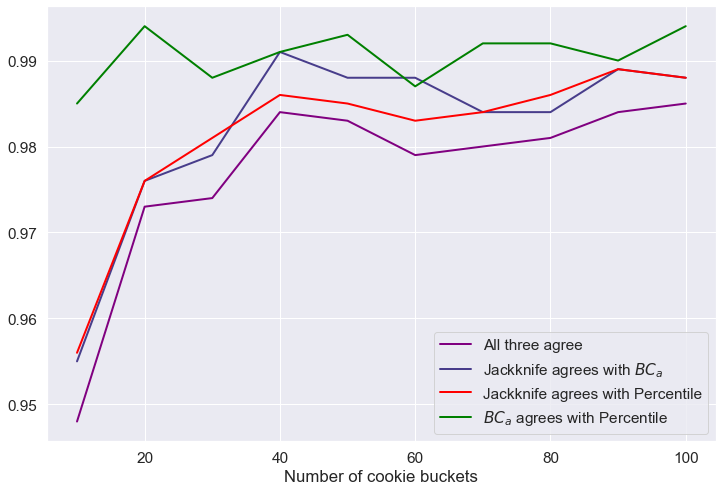

In [623]:
plt.plot(num_of_cookie_buckets, lognormal_aver_agreed_all_three_99, c='purple', label='All three agree')
plt.plot(num_of_cookie_buckets, lognormal_aver_agreed_jack_bca_99, c='darkslateblue', label='Jackknife agrees with $BC_a$')
plt.plot(num_of_cookie_buckets, lognormal_aver_agreed_jack_percentile_99, c='red', label='Jackknife agrees with Percentile')
plt.plot(num_of_cookie_buckets, lognormal_aver_agreed_bca_percentile_99, c='green', label='$BC_a$ agrees with Percentile')
plt.xlabel('Number of cookie buckets')
plt.legend()
plt.show()

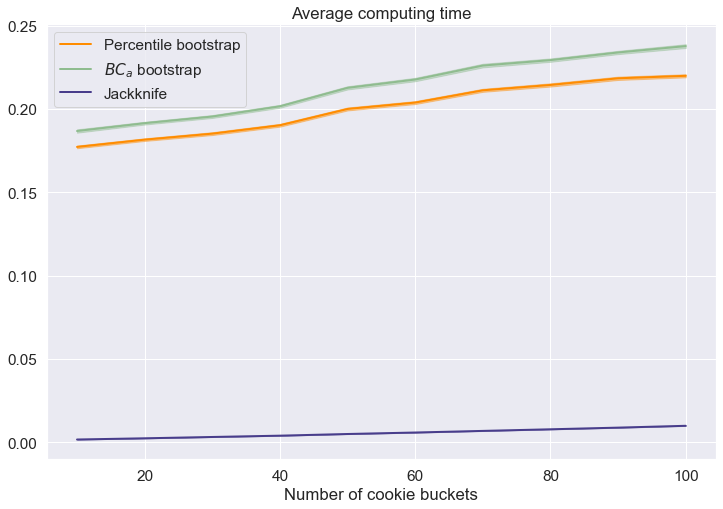

In [624]:
plt.plot(num_of_cookie_buckets, lognormal_aver_timing_percentile_99, c='DarkOrange', label='Percentile bootstrap')
plt.plot(num_of_cookie_buckets, lognormal_aver_timing_bca_99, c='DarkSeaGreen', label='$BC_a$ bootstrap')
plt.plot(num_of_cookie_buckets, lognormal_aver_timing_jack_99, c='darkslateblue',label='Jackknife')

plt.fill_between(num_of_cookie_buckets,lognormal_aver_timing_percentile_99 - 1.96 * std_lognormal_aver_timing_percentile_99,
    lognormal_aver_timing_percentile_99 + 1.96*std_lognormal_aver_timing_percentile_99, color='DarkOrange', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,lognormal_aver_timing_bca_99 - 1.96 * std_lognormal_aver_timing_bca_99,
    lognormal_aver_timing_bca_99 + 1.96*std_lognormal_aver_timing_bca_99, color='DarkSeaGreen', alpha=0.4)


plt.fill_between(num_of_cookie_buckets,lognormal_aver_timing_jack_99 - 1.96 * std_lognormal_aver_timing_jack_99,
    lognormal_aver_timing_jack_99 + 1.96*std_lognormal_aver_timing_jack_99, color='darkslateblue', alpha=0.4)


plt.title('Average computing time')
plt.xlabel('Number of cookie buckets')
plt.legend()
plt.show()

## Sanity check (changing the nominal coverage level)

In [658]:
sanity_lognormal_varying_res_percentile_50=list()
sanity_lognormal_varying_res_bc_a_50=list()
sanity_lognormal_varying_res_jack_50=list()

sanity_lognormal_varying_length_percentile_50=list()
sanity_lognormal_varying_length_bc_a_50=list()
sanity_lognormal_varying_length_jack_50=list()

sanity_lognormal_varying_int_score_percentile_50=list()
sanity_lognormal_varying_int_score_bc_a_50=list()
sanity_lognormal_varying_int_score_jack_50=list()

sanity_lognormal_agreed_jack_bc_a_50 = list()
sanity_lognormal_agreed_jack_percentile_50 = list()
sanity_lognormal_agreed_bc_a_percentile_50 = list()
sanity_lognormal_agreed_all_three_50 = list()

sanity_lognormal_timing_bca_50 = list()
sanity_lognormal_timing_percentile_50 = list()
sanity_lognormal_timing_jack_50 = list()

In [659]:
for cur_num_of_cookie_buckets in num_of_cookie_buckets:
    sanity_lognormal_varying_res_percentile_50+=[[]]
    sanity_lognormal_varying_res_bc_a_50+=[[]]
    sanity_lognormal_varying_res_jack_50+=[[]]

    sanity_lognormal_varying_length_percentile_50+=[[]]
    sanity_lognormal_varying_length_bc_a_50+=[[]]
    sanity_lognormal_varying_length_jack_50+=[[]]

    sanity_lognormal_varying_int_score_percentile_50+=[[]]
    sanity_lognormal_varying_int_score_bc_a_50+=[[]]
    sanity_lognormal_varying_int_score_jack_50+=[[]]

    sanity_lognormal_agreed_jack_bc_a_50 +=[[]]
    sanity_lognormal_agreed_jack_percentile_50+=[[]]
    sanity_lognormal_agreed_bc_a_percentile_50 +=[[]]
    sanity_lognormal_agreed_all_three_50 +=[[]]

    sanity_lognormal_timing_bca_50 +=[[]]
    sanity_lognormal_timing_percentile_50 +=[[]]
    sanity_lognormal_timing_jack_50 +=[[]]


In [660]:
for i in range(num_of_sims):
    # generate raw data
    raw_data_treatment = generate_raw_data_lognormal(number_of_users = 1000, mean_param=7,sigma_param=1)
    raw_data_control = generate_raw_data_lognormal(number_of_users = 1000, mean_param=7,sigma_param=1)

    for cur_ind, cur_num_of_cookie_buckets in enumerate(num_of_cookie_buckets):

        # bin raw data and place the clients into cookie buckets
        bucketed_data_treat = get_binned_data_cookie_bucket_level(raw_data_treatment,cur_num_of_cookie_buckets, bins_boundaries)
        bucketed_data_control = get_binned_data_cookie_bucket_level(raw_data_control,cur_num_of_cookie_buckets, bins_boundaries)

        start_time = time.time()

        res_percentile = percentile_bootstrap_ci_ratio_cookie_buckets(bucketed_data_treat, bucketed_data_control,
                                            bins_boundaries, 2000, 0.7,
                                            estimator_type='quantile',
                                            quantile=0.5, return_interval=True)
        sanity_lognormal_timing_percentile_50[cur_ind]+=[time.time()-start_time]
        start_time = time.time()

        res_bc_a = bc_a_bootstrap_ratio_cookie_buckets(bucketed_data_treat, bucketed_data_control,
                                            bins_boundaries, 2000, 0.7,
                                            estimator_type='quantile',
                                            quantile=0.5, return_interval=True)
        sanity_lognormal_timing_bca_50[cur_ind]+=[time.time()-start_time]
        
        start_time = time.time()

        res_jack = jackknife_cookie_bucket_quantile_bucketed(bucketed_data_treat, bucketed_data_control,
                                            bins_boundaries, 0.7,
                                            quantile_to_test= 0.5, return_interval=True)

        sanity_lognormal_timing_jack_50[cur_ind]+=[time.time()-start_time]
        
        # add coverage result
        sanity_lognormal_varying_res_percentile_50[cur_ind]+=[res_percentile[0]]
        sanity_lognormal_varying_res_bc_a_50[cur_ind]+=[res_bc_a[0]]
        sanity_lognormal_varying_res_jack_50[cur_ind]+=[res_jack[0]]

        #add length
        sanity_lognormal_varying_length_percentile_50[cur_ind]+=[res_percentile[1][1]-res_percentile[1][0]]
        sanity_lognormal_varying_length_bc_a_50[cur_ind]+=[res_bc_a[1][1]-res_bc_a[1][0]]
        sanity_lognormal_varying_length_jack_50[cur_ind]+=[res_jack[1][1]-res_jack[1][0]]

        #add scores
        sanity_lognormal_varying_int_score_percentile_50[cur_ind]+=[compute_interval_score(res_percentile[1][1],res_percentile[1][0],1-0.95,0)]
        sanity_lognormal_varying_int_score_bc_a_50[cur_ind]+=[compute_interval_score(res_bc_a[1][1],res_bc_a[1][0],1-0.95,0)]
        sanity_lognormal_varying_int_score_jack_50[cur_ind]+=[compute_interval_score(res_jack[1][1],res_jack[1][0],1-0.95,0)]

        sanity_lognormal_agreed_bc_a_percentile_50[cur_ind]+=[res_bc_a[0]==res_percentile[0]]
        sanity_lognormal_agreed_jack_bc_a_50[cur_ind]+=[res_jack[0]==res_bc_a[0]]
        sanity_lognormal_agreed_jack_percentile_50[cur_ind]+=[res_jack[0]==res_percentile[0]]
        sanity_lognormal_agreed_all_three_50[cur_ind]+=[res_jack[0]==res_percentile[0] == res_bc_a[0]]


In [670]:
sanity_lognormal_aver_rej_rate_percentile_50 = np.array([np.mean(cur_sample) for cur_sample in   sanity_lognormal_varying_res_percentile_50])
sanity_lognormal_aver_rej_rate_bca_50 = np.array([np.mean(cur_sample) for cur_sample in   sanity_lognormal_varying_res_bc_a_50])
sanity_lognormal_aver_rej_rate_jack_50 = np.array([np.mean(cur_sample) for cur_sample in   sanity_lognormal_varying_res_jack_50])

sanity_lognormal_aver_length_percentile_50 = np.array([np.mean(cur_sample) for cur_sample in  sanity_lognormal_varying_length_percentile_50])
sanity_lognormal_aver_length_bca_50 = np.array([np.mean(cur_sample) for cur_sample in   sanity_lognormal_varying_length_bc_a_50])
sanity_lognormal_aver_length_jack_50 = np.array([np.mean(cur_sample) for cur_sample in   sanity_lognormal_varying_length_jack_50])

sanity_lognormal_aver_int_score_percentile_50 = np.array([np.mean(cur_sample) for cur_sample in   sanity_lognormal_varying_int_score_percentile_50])
sanity_lognormal_aver_int_score_bca_50 = np.array([np.mean(cur_sample) for cur_sample in   sanity_lognormal_varying_int_score_bc_a_50])
sanity_lognormal_aver_int_score_jack_50 = np.array([np.mean(cur_sample) for cur_sample in   sanity_lognormal_varying_int_score_jack_50])

sanity_lognormal_aver_agreed_jack_bca_50 = np.array([np.mean(cur_sample) for cur_sample in   sanity_lognormal_agreed_jack_bc_a_50])
sanity_lognormal_aver_agreed_jack_percentile_50 = np.array([np.mean(cur_sample) for cur_sample in   sanity_lognormal_agreed_jack_percentile_50])
sanity_lognormal_aver_agreed_bca_percentile_50 = np.array([np.mean(cur_sample) for cur_sample in   sanity_lognormal_agreed_bc_a_percentile_50])
sanity_lognormal_aver_agreed_all_three_50 = np.array([np.mean(cur_sample) for cur_sample in   sanity_lognormal_agreed_all_three_50])

sanity_lognormal_aver_timing_percentile_50 = np.array([np.mean(cur_sample) for cur_sample in sanity_lognormal_timing_percentile_50])
sanity_lognormal_aver_timing_bca_50 = np.array([np.mean(cur_sample) for cur_sample in sanity_lognormal_timing_bca_50])
sanity_lognormal_aver_timing_jack_50 = np.array([np.mean(cur_sample) for cur_sample in sanity_lognormal_timing_jack_50])

In [671]:
# deviations normalized by number of sims
sanity_std_lognormal_aver_rej_rate_percentile_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in sanity_lognormal_varying_res_percentile_50])
sanity_std_lognormal_aver_rej_rate_bca_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in sanity_lognormal_varying_res_bc_a_50])
sanity_std_lognormal_aver_rej_rate_jack_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in sanity_lognormal_varying_res_jack_50])

sanity_std_lognormal_aver_length_percentile_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in sanity_lognormal_varying_length_percentile_50])
sanity_std_lognormal_aver_length_bca_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in sanity_lognormal_varying_length_bc_a_50])
sanity_std_lognormal_aver_length_jack_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in sanity_lognormal_varying_length_jack_50])

sanity_std_lognormal_aver_int_score_percentile_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in sanity_lognormal_varying_int_score_percentile_50])
sanity_std_lognormal_aver_int_score_bca_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in sanity_lognormal_varying_int_score_bc_a_50])
sanity_std_lognormal_aver_int_score_jack_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in sanity_lognormal_varying_int_score_jack_50])

sanity_std_lognormal_aver_agreed_jack_bca_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in lognormal_agreed_jack_bc_a_50])
sanity_std_lognormal_aver_agreed_jack_percentile_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in sanity_lognormal_agreed_jack_percentile_50])
sanity_std_lognormal_aver_agreed_bca_percentile_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in sanity_lognormal_agreed_bc_a_percentile_50])
sanity_std_lognormal_aver_agreed_all_three_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in sanity_lognormal_agreed_all_three_50])

sanity_std_lognormal_aver_timing_percentile_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in sanity_lognormal_timing_percentile_50])
sanity_std_lognormal_aver_timing_bca_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in sanity_lognormal_timing_bca_50])
sanity_std_lognormal_aver_timing_jack_50 = np.array([np.std(cur_sample)/np.sqrt(num_of_sims) for cur_sample in sanity_lognormal_timing_jack_50])

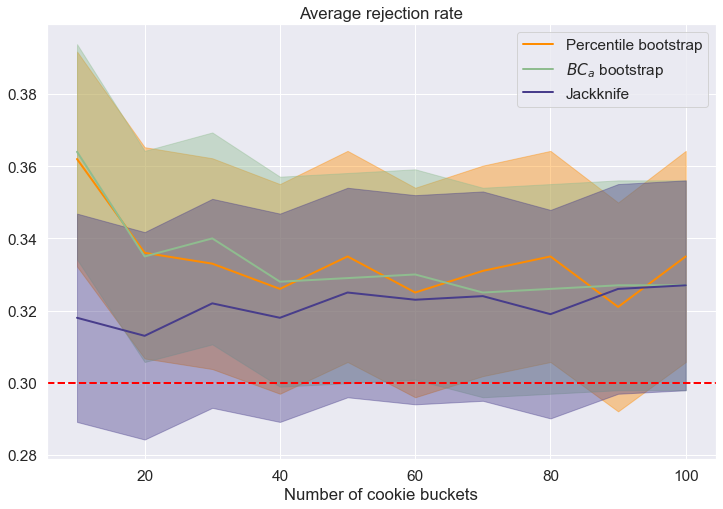

In [672]:
plt.plot(num_of_cookie_buckets, sanity_lognormal_aver_rej_rate_percentile_50, c='DarkOrange', label='Percentile bootstrap')
plt.plot(num_of_cookie_buckets, sanity_lognormal_aver_rej_rate_bca_50,  c='DarkSeaGreen', label='$BC_a$ bootstrap')
plt.plot(num_of_cookie_buckets, sanity_lognormal_aver_rej_rate_jack_50,c='darkslateblue', label='Jackknife')

plt.fill_between(num_of_cookie_buckets,sanity_lognormal_aver_rej_rate_percentile_50 - 1.96 * sanity_std_lognormal_aver_rej_rate_percentile_50,
    sanity_lognormal_aver_rej_rate_percentile_50 + 1.96*sanity_std_lognormal_aver_rej_rate_percentile_50, color='DarkOrange', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,sanity_lognormal_aver_rej_rate_bca_50 - 1.96 * sanity_std_lognormal_aver_rej_rate_bca_50,
    sanity_lognormal_aver_rej_rate_bca_50 + 1.96*sanity_std_lognormal_aver_rej_rate_bca_50, color='DarkSeaGreen', alpha=0.4)


plt.fill_between(num_of_cookie_buckets,sanity_lognormal_aver_rej_rate_jack_50 - 1.96 * sanity_std_lognormal_aver_rej_rate_jack_50,
    sanity_lognormal_aver_rej_rate_jack_50 + 1.96*sanity_std_lognormal_aver_rej_rate_jack_50, color='darkslateblue', alpha=0.4)


plt.axhline(0.3, color='red', linestyle='dashed')
plt.title('Average rejection rate')
plt.xlabel('Number of cookie buckets')
plt.legend()
plt.show()

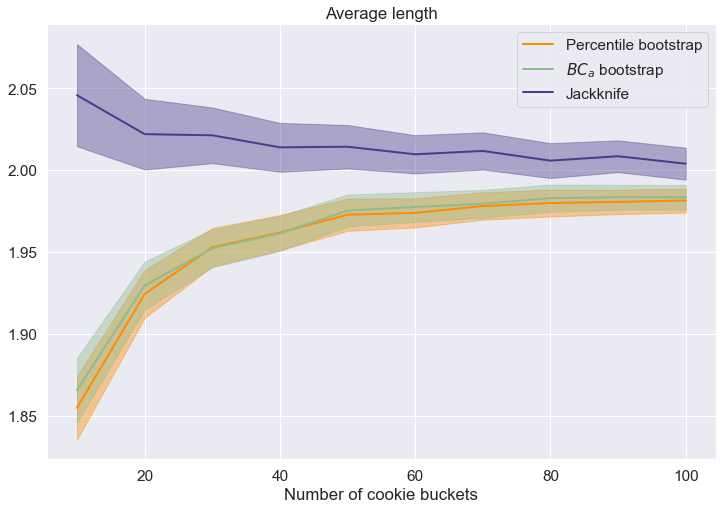

In [673]:
plt.plot(num_of_cookie_buckets, sanity_lognormal_aver_length_percentile_50, c='DarkOrange', label='Percentile bootstrap')
plt.plot(num_of_cookie_buckets, sanity_lognormal_aver_length_bca_50, c='DarkSeaGreen', label='$BC_a$ bootstrap')
plt.plot(num_of_cookie_buckets, sanity_lognormal_aver_length_jack_50, c='darkslateblue',label='Jackknife')

plt.fill_between(num_of_cookie_buckets,sanity_lognormal_aver_length_percentile_50 - 1.96 * sanity_std_lognormal_aver_length_percentile_50,
    sanity_lognormal_aver_length_percentile_50 + 1.96*sanity_std_lognormal_aver_length_percentile_50, color='DarkOrange', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,sanity_lognormal_aver_length_bca_50 - 1.96 * sanity_std_lognormal_aver_length_bca_50,
    sanity_lognormal_aver_length_bca_50 + 1.96*sanity_std_lognormal_aver_length_bca_50, color='DarkSeaGreen', alpha=0.4)


plt.fill_between(num_of_cookie_buckets,sanity_lognormal_aver_length_jack_50 - 1.96 * sanity_std_lognormal_aver_length_jack_50,
    sanity_lognormal_aver_length_jack_50 + 1.96*sanity_std_lognormal_aver_length_jack_50, color='darkslateblue', alpha=0.4)


plt.title('Average length')
plt.xlabel('Number of cookie buckets')
plt.legend()
plt.show()

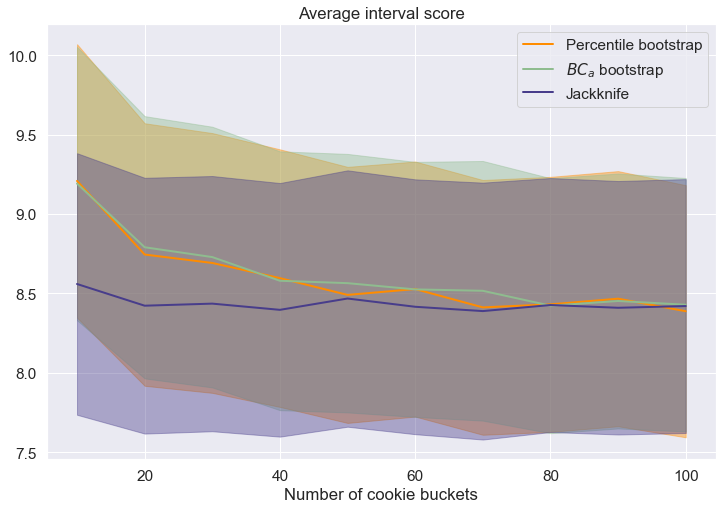

In [674]:
plt.plot(num_of_cookie_buckets, sanity_lognormal_aver_int_score_percentile_50, c='DarkOrange', label='Percentile bootstrap')
plt.plot(num_of_cookie_buckets, sanity_lognormal_aver_int_score_bca_50, c='DarkSeaGreen', label='$BC_a$ bootstrap')
plt.plot(num_of_cookie_buckets, sanity_lognormal_aver_int_score_jack_50, c='darkslateblue',label='Jackknife')

plt.fill_between(num_of_cookie_buckets,sanity_lognormal_aver_int_score_percentile_50 - 1.96 * sanity_std_lognormal_aver_int_score_percentile_50,
    sanity_lognormal_aver_int_score_percentile_50 + 1.96*sanity_std_lognormal_aver_int_score_percentile_50, color='DarkOrange', alpha=0.4)

plt.fill_between(num_of_cookie_buckets,sanity_lognormal_aver_int_score_bca_50 - 1.96 * sanity_std_lognormal_aver_int_score_bca_50,
    sanity_lognormal_aver_int_score_bca_50 + 1.96*sanity_std_lognormal_aver_int_score_bca_50, color='DarkSeaGreen', alpha=0.4)


plt.fill_between(num_of_cookie_buckets,sanity_lognormal_aver_int_score_jack_50 - 1.96 * sanity_std_lognormal_aver_int_score_jack_50,
    sanity_lognormal_aver_int_score_jack_50 + 1.96*sanity_std_lognormal_aver_int_score_jack_50, color='darkslateblue', alpha=0.4)


plt.title('Average interval score')
plt.xlabel('Number of cookie buckets')
plt.legend()
plt.show()

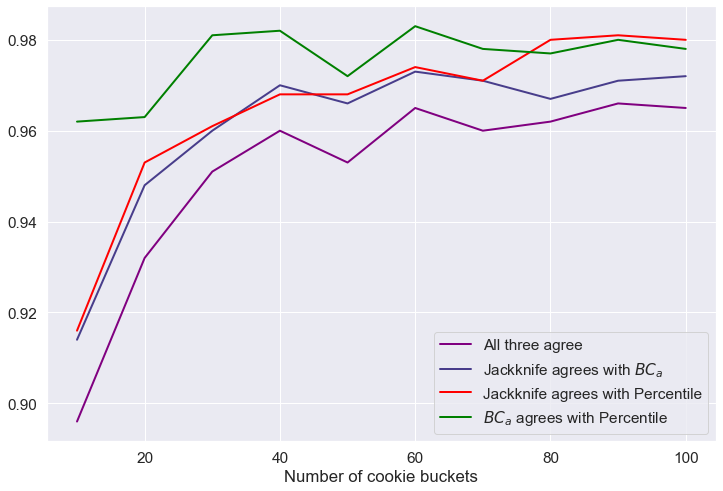

In [675]:
plt.plot(num_of_cookie_buckets, sanity_lognormal_aver_agreed_all_three_50, c='purple', label='All three agree')
plt.plot(num_of_cookie_buckets, sanity_lognormal_aver_agreed_jack_bca_50, c='darkslateblue', label='Jackknife agrees with $BC_a$')
plt.plot(num_of_cookie_buckets, sanity_lognormal_aver_agreed_jack_percentile_50, c='red', label='Jackknife agrees with Percentile')
plt.plot(num_of_cookie_buckets, sanity_lognormal_aver_agreed_bca_percentile_50, c='green', label='$BC_a$ agrees with Percentile')
plt.xlabel('Number of cookie buckets')
plt.legend()
plt.show()